# End-to-End Customer Analytics & Predictive Modeling


### Project Steps
1. **Project Overview**
3. **Data Description**
4. **Exploratory Data Analysis**
5. **Data Cleaning & Preprocessing** 
2. **Business Problem**
6. **RFM Segmentation**
7. **K-Means Clustering**
8. **Probabilistic CLV Modeling (BG/NBD + Gamma-Gamma)**
9. **Baseline Machine Learning Model**
10. **Leakage Analysis**
11. **Time-Based Predictive Modeling (Final Model)**
12. **Final Conclusion**




## 📌 Project Overview

This notebook presents an end-to-end customer analytics pipeline using a real-world e-commerce transaction dataset.

The workflow includes:

- RFM segmentation
- K-Means clustering
- Probabilistic CLV modeling (BG/NBD + Gamma-Gamma)
- Baseline classification modeling
- Leakage detection
- Time-based predictive modeling using XGBoost

The final objective is to predict high-value customers using a realistic forward validation strategy.

---

## 📊 About the Dataset

### Context
E-commerce datasets are typically proprietary and rarely publicly available.  
This dataset is provided by the **UCI Machine Learning Repository** and contains real transaction data from an online retail company operating between **2010 and 2011**.

The dataset is published under the title **"Online Retail"**.

### Content
This is a **transnational dataset** containing all transactions occurring between:

📅 **01/12/2010 — 09/12/2011**

for a **UK-based registered non-store online retail company**.

- The company primarily sells unique all-occasion gifts.
- A significant portion of customers are wholesalers.
- Each row represents a transactional record.

### Possible Analysis Areas
This dataset enables various analytical approaches, including:

- Time Series Analysis
- Customer Segmentation
- Clustering
- Classification
- Customer Lifetime Value Modeling

---

## 🙏 Acknowledgements

According to the UCI Machine Learning Repository, the dataset was made available by:

**Dr. Daqing Chen**  
Director, Public Analytics Group  
School of Engineering  
London South Bank University, UK  
📧 chend@lsbu.ac.uk

Dataset Source: UCI Machine Learning Repository — *Online Retail Dataset*

Image credits: stocksnap.io

---

## 🎯 Objective

The main objective of this project is to analyze customer purchasing behavior and build predictive models to estimate customer value and segment customers based on purchasing patterns.


# Data Description

## Import Library

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data.csv",
    encoding='latin1')
df = data.copy()

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape


(541909, 8)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


# Exploratory Data Analysis

## Column Analyses

### 1️⃣ InvoiceNo

In [7]:
df['InvoiceNo'].sample(10)


451684    575220
347472    567305
501762    578829
400324    571305
456271    575681
65887     541698
453530    575483
140700    548455
437647    574298
275342    560978
Name: InvoiceNo, dtype: object

In [8]:
df['InvoiceNo'].nunique()


25900

In [9]:
df['InvoiceNo'].str.startswith('C').value_counts()

# If True, return transactions are present.

False    532621
True       9288
Name: InvoiceNo, dtype: int64

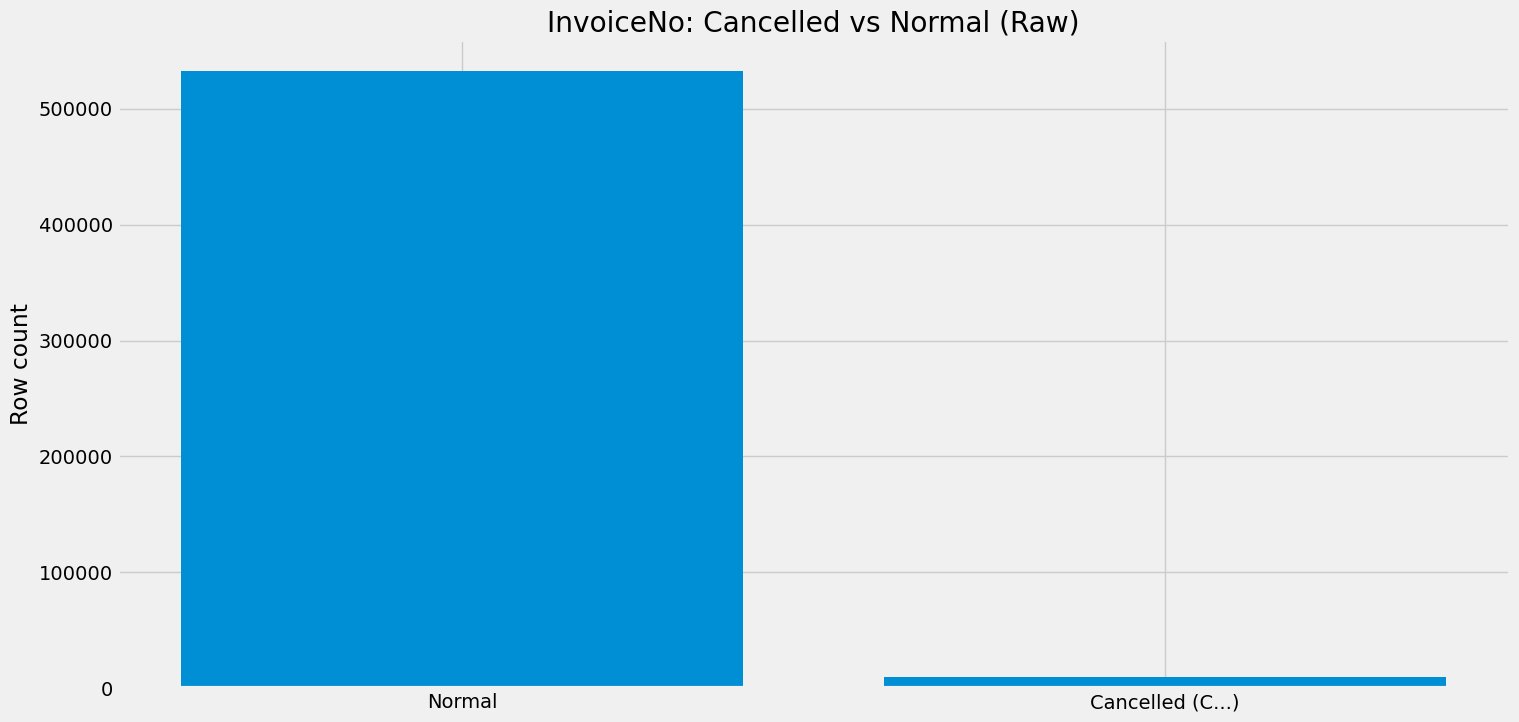

In [10]:
# Return invoice ratio: invoices starting with "C"
is_cancel = df['InvoiceNo'].astype(str).str.startswith('C', na=False)
counts = is_cancel.value_counts()

plt.figure()
plt.bar(['Normal', 'Cancelled (C...)'], [counts.get(False, 0), counts.get(True, 0)])
plt.title("InvoiceNo: Cancelled vs Normal (Raw)")
plt.ylabel("Row count")
plt.show()

In [11]:
df['InvoiceNo'].isna().sum()


0

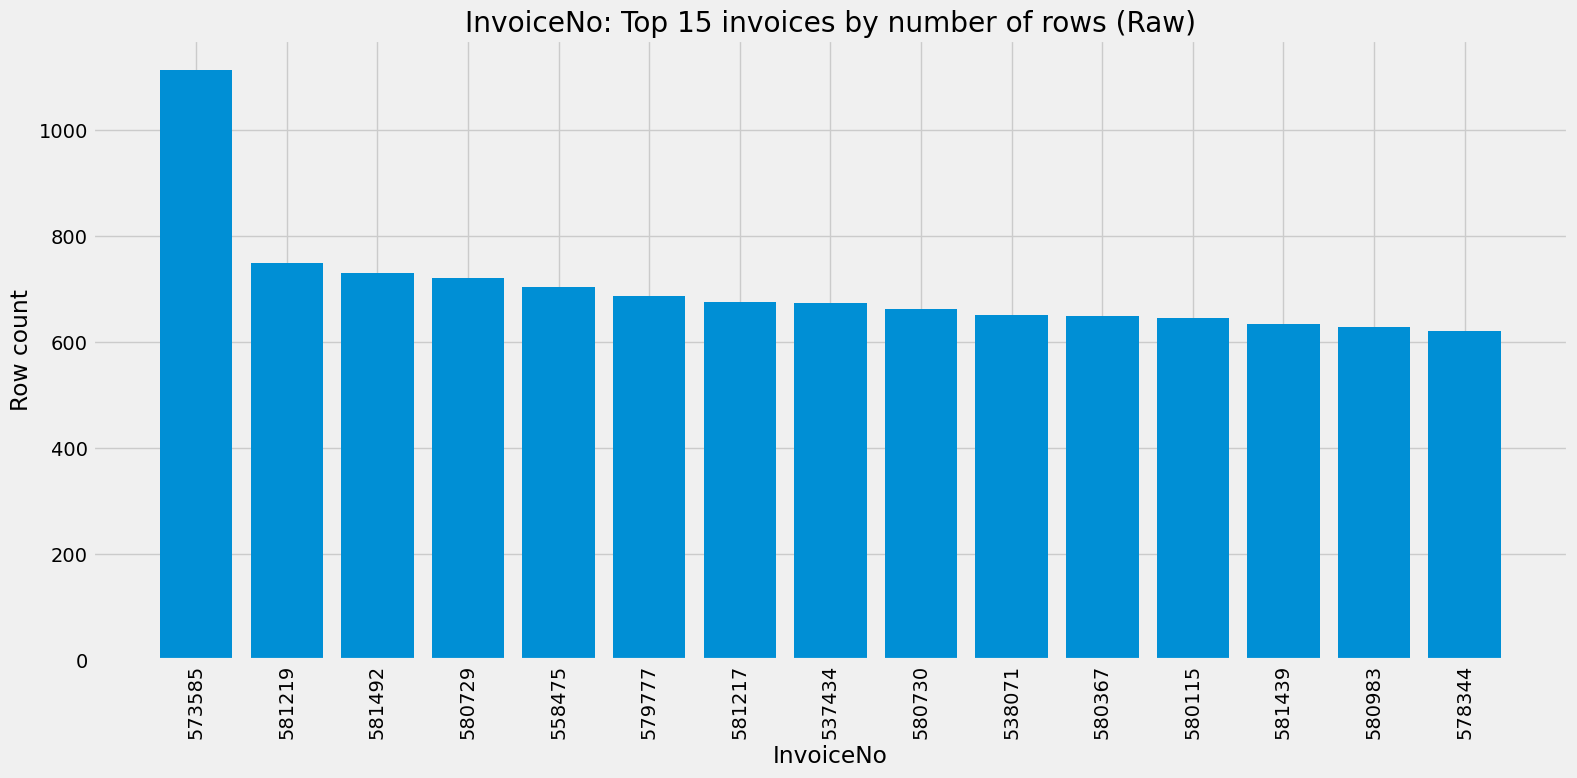

In [12]:
# Invoices with the highest number of rows (Top 15)
top_invoices = df['InvoiceNo'].value_counts().head(15)

plt.figure()
plt.bar(top_invoices.index.astype(str), top_invoices.values)
plt.title("InvoiceNo: Top 15 invoices by number of rows (Raw)")
plt.xlabel("InvoiceNo")
plt.ylabel("Row count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### **InvoiceNo Notes**
- Invoice identifier
- Values starting with "C" represent returns
- Must remain string type
- Important for analysis

### 2️⃣ StockCode

In [13]:
df['StockCode'].head(20)

# Contains letters

0     85123A
1      71053
2     84406B
3     84029G
4     84029E
5      22752
6      21730
7      22633
8      22632
9      84879
10     22745
11     22748
12     22749
13     22310
14     84969
15     22623
16     22622
17     21754
18     21755
19     21777
Name: StockCode, dtype: object

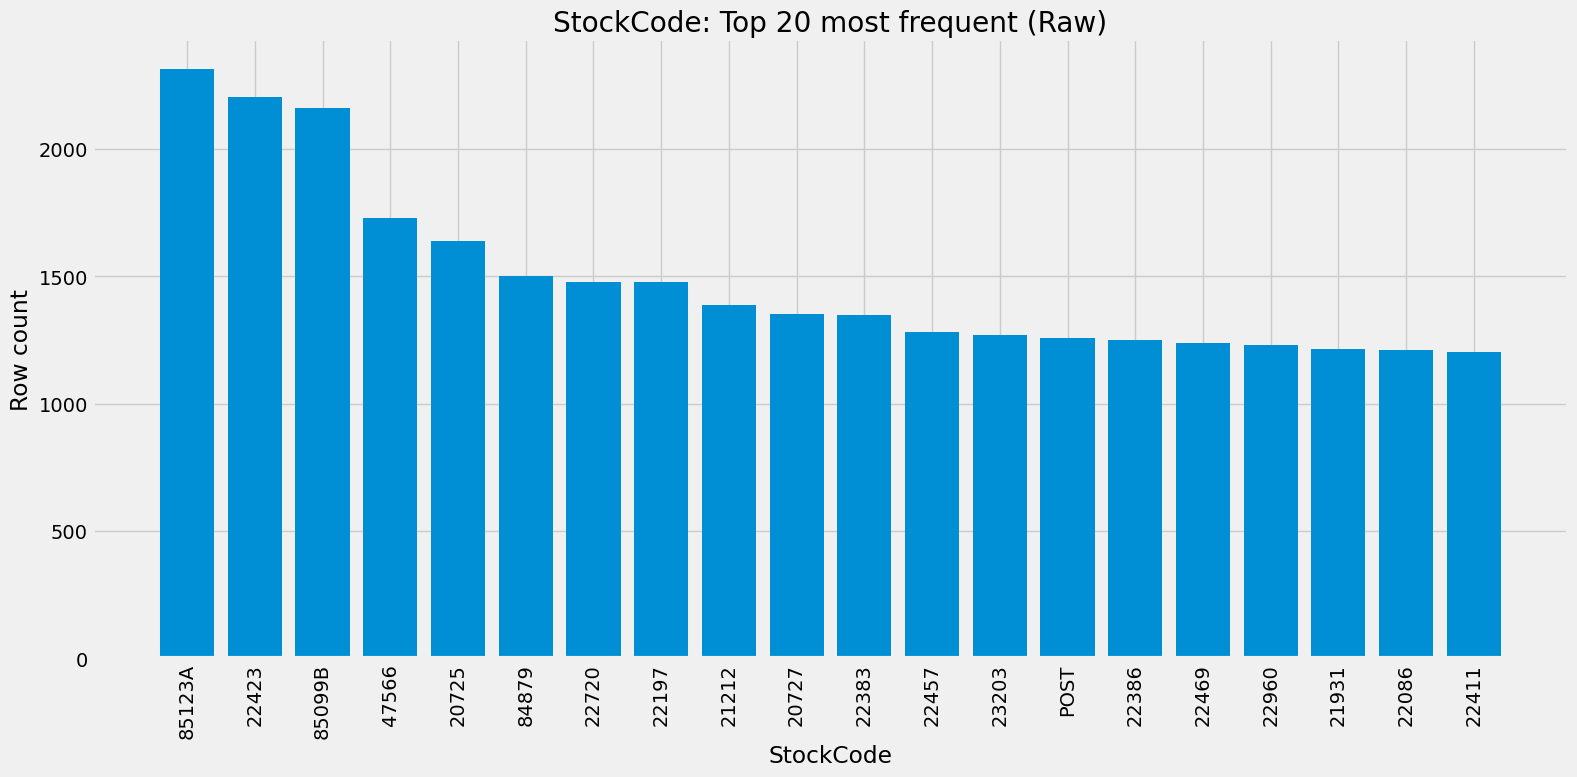

In [14]:
# Most Frequent StockCodes (Top 20)
top_codes = df['StockCode'].astype(str).value_counts().head(20)

plt.figure()
plt.bar(top_codes.index, top_codes.values)
plt.title("StockCode: Top 20 most frequent (Raw)")
plt.xlabel("StockCode")
plt.ylabel("Row count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
df['StockCode'].nunique()


4070

In [16]:
df['StockCode'].isna().sum()


0

In [17]:
df['StockCode'].value_counts().head(20)

#There are special codes such as "POST".

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
22383     1348
22457     1280
23203     1267
POST      1256
22386     1251
22469     1239
22960     1229
21931     1214
22086     1210
22411     1202
Name: StockCode, dtype: int64

In [18]:
only_digits = df['StockCode'].astype(str).str.fullmatch(r'\d+')
only_digits.value_counts()

# Consisting only of numbers


True     487036
False     54873
Name: StockCode, dtype: int64

In [19]:
has_letters = df['StockCode'].astype(str).str.contains(r'[A-Za-z]')
has_letters.value_counts()

# Containing letters

False    487036
True      54873
Name: StockCode, dtype: int64

In [20]:
df[df['StockCode'].astype(str).str.contains(r'POST|BANK|CHARGES|MANUAL|DISCOUNT', case=False, na=False)][
    ['StockCode','Description','Quantity','UnitPrice','Country']
].head(20)


,StockCode,Description,Quantity,UnitPrice,Country
45,POST,POSTAGE,3,18.0,France
386,POST,POSTAGE,1,15.0,Netherlands
1123,POST,POSTAGE,1,18.0,Germany
4406,BANK CHARGES,Bank Charges,1,15.0,United Kingdom
5073,POST,POSTAGE,1,18.0,Germany
5258,POST,POSTAGE,1,18.0,France
5325,POST,POSTAGE,2,40.0,Switzerland
5369,POST,POSTAGE,3,18.0,Germany
6602,POST,POSTAGE,1,18.0,Germany
6676,POST,POSTAGE,2,18.0,France


### ⚠️ Special StockCodes — Interpretation

#### 🔴 POST (Postage Fees)

**Example**
- **StockCode:** POST  
- **Description:** POSTAGE  
- **Quantity:** 1–9  
- **UnitPrice:** 15–40  

📌 This does **not represent a product**  
📌 Indicates **shipping / postage charges**

---

#### 🔴 BANK CHARGES

- **StockCode:** BANK CHARGES  
- **Description:** Bank Charges  

📌 Represents a **financial transaction**  
📌 Not related to product-level analysis

---

### 🧩 What Does This Mean?

The **StockCode** column contains two different types of entries:

✅ **Actual products**  
⚠️ **Non-product transactional records**, such as:

- Shipping fees
- Bank charges
- Manual adjustments
- Discounts
- Accounting adjustments

These records should be carefully handled or excluded depending on the analysis objective.


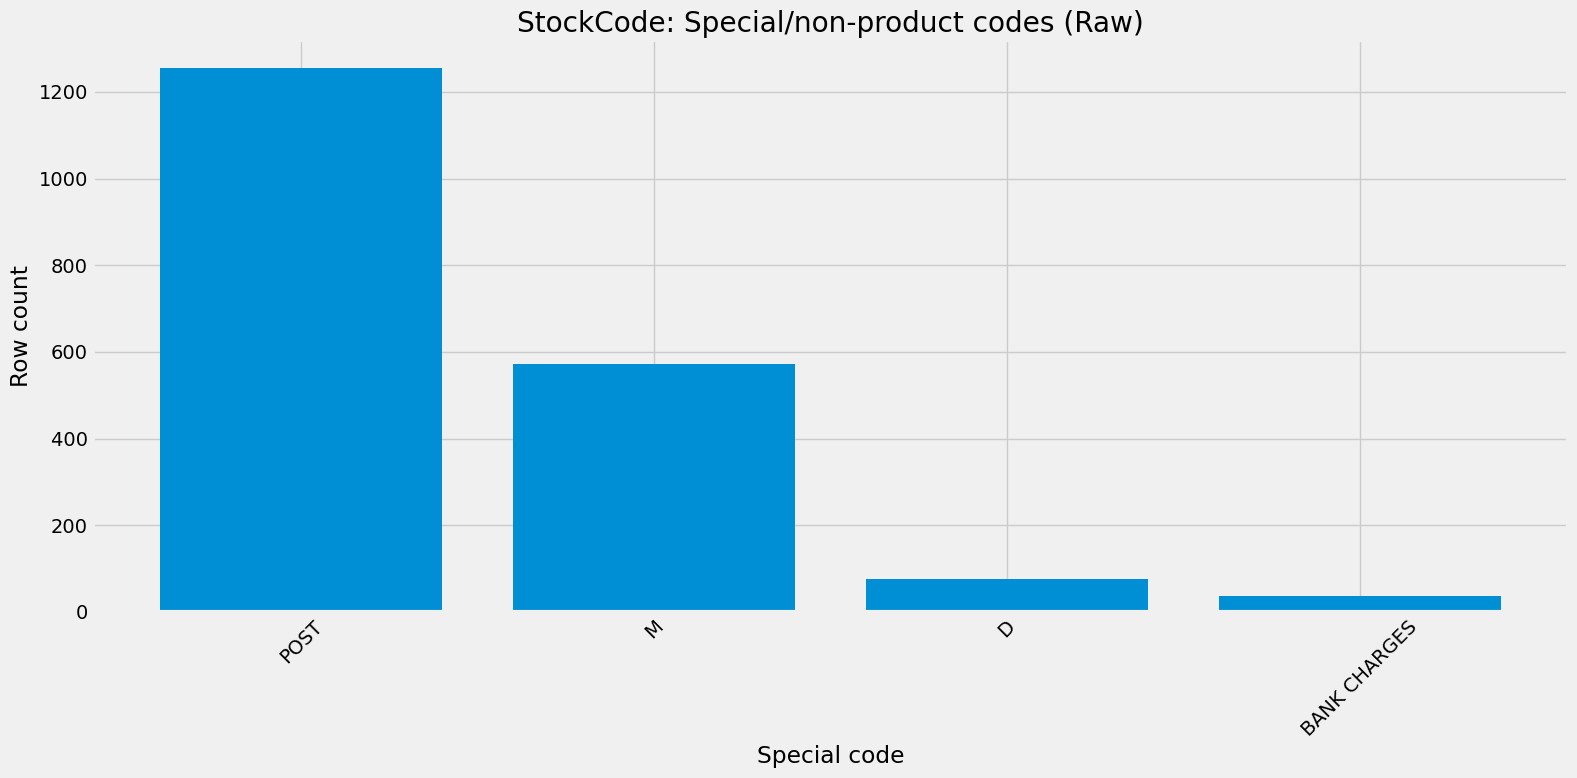

In [21]:
# Comparison of Special Codes (if any)
special = ['POST', 'BANK CHARGES', 'D', 'M', 'MANUAL']
sc = df['StockCode'].astype(str)
special_counts = sc[sc.isin(special)].value_counts()

plt.figure()
plt.bar(special_counts.index.astype(str), special_counts.values)
plt.title("StockCode: Special/non-product codes (Raw)")
plt.xlabel("Special code")
plt.ylabel("Row count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 📦 StockCode — Notes

- Contains **4,070 unique values**
- No missing values
- Majority represent actual product codes
- Non-product entries exist (e.g., **POST**, **BANK CHARGES**)
- Not removed at this stage; will be filtered during later preprocessing steps



### 3️⃣ Description

In [22]:
df['Description'].isna().sum()


1454

In [23]:
(df['Description'].astype(str).str.strip() == "").sum()


0

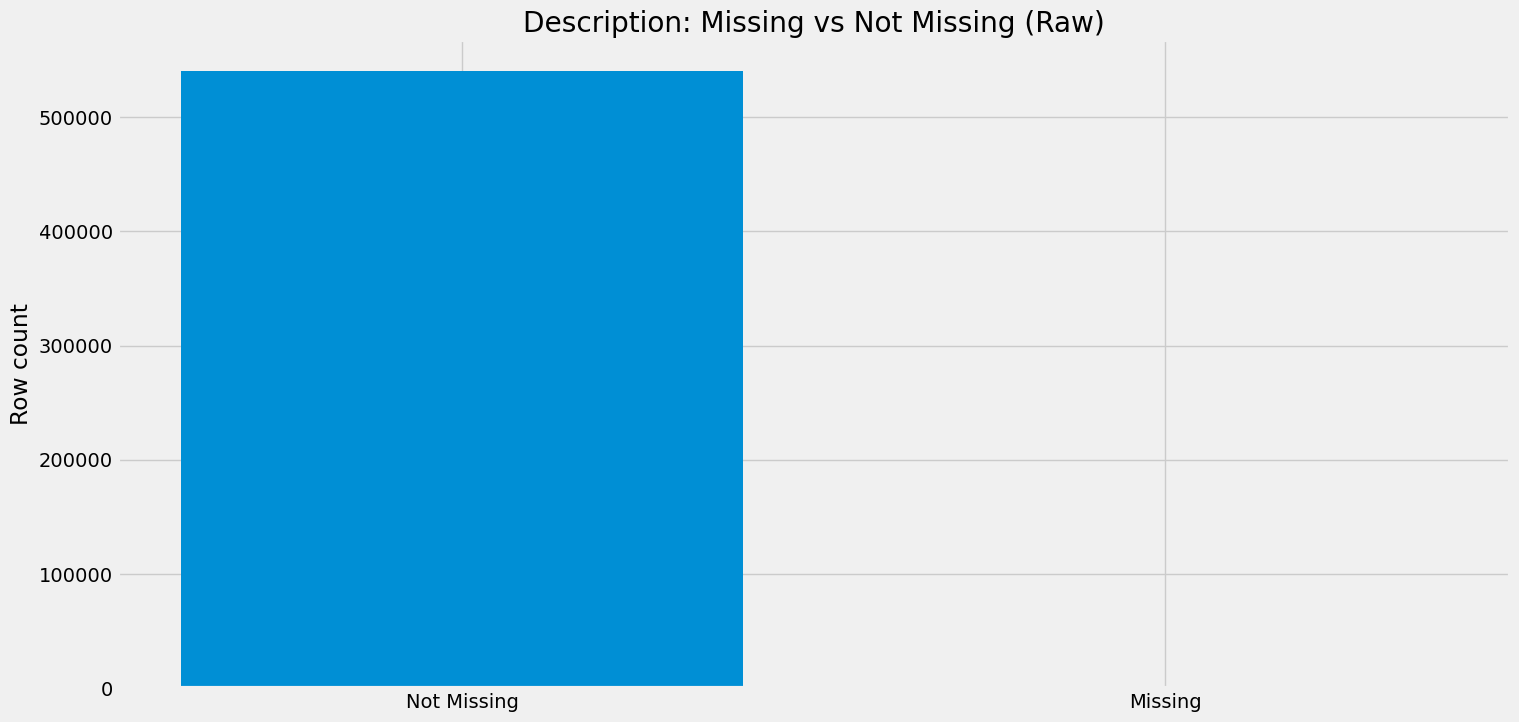

In [24]:
# Is the Description column missing or complete?
desc_missing = df['Description'].isna().value_counts()

plt.figure()
plt.bar(['Not Missing', 'Missing'], [desc_missing.get(False, 0), desc_missing.get(True, 0)])
plt.title("Description: Missing vs Not Missing (Raw)")
plt.ylabel("Row count")
plt.show()

In [25]:
df['Description'].head(20)

#Note: Some values contain trailing spaces (e.g., "IVORY KNITTED MUG COSY ").

0      WHITE HANGING HEART T-LIGHT HOLDER
1                     WHITE METAL LANTERN
2          CREAM CUPID HEARTS COAT HANGER
3     KNITTED UNION FLAG HOT WATER BOTTLE
4          RED WOOLLY HOTTIE WHITE HEART.
5            SET 7 BABUSHKA NESTING BOXES
6       GLASS STAR FROSTED T-LIGHT HOLDER
7                  HAND WARMER UNION JACK
8               HAND WARMER RED POLKA DOT
9           ASSORTED COLOUR BIRD ORNAMENT
10             POPPY'S PLAYHOUSE BEDROOM 
11              POPPY'S PLAYHOUSE KITCHEN
12      FELTCRAFT PRINCESS CHARLOTTE DOLL
13                IVORY KNITTED MUG COSY 
14     BOX OF 6 ASSORTED COLOUR TEASPOONS
15          BOX OF VINTAGE JIGSAW BLOCKS 
16         BOX OF VINTAGE ALPHABET BLOCKS
17               HOME BUILDING BLOCK WORD
18               LOVE BUILDING BLOCK WORD
19            RECIPE BOX WITH METAL HEART
Name: Description, dtype: object

In [26]:
df['Description'].value_counts().head(20)


WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
POSTAGE                               1252
JUMBO BAG PINK POLKADOT               1251
HEART OF WICKER SMALL                 1237
JAM MAKING SET WITH JARS              1229
JUMBO STORAGE BAG SUKI                1214
PAPER CHAIN KIT 50'S CHRISTMAS        1210
JUMBO SHOPPER VINTAGE RED PAISLEY     1202
LUNCH BAG CARS BLUE                   1197
LUNCH BAG SPACEBOY DESIGN             1192
JAM MAKING SET PRINTED                1182
Name: Description, dtype: int64

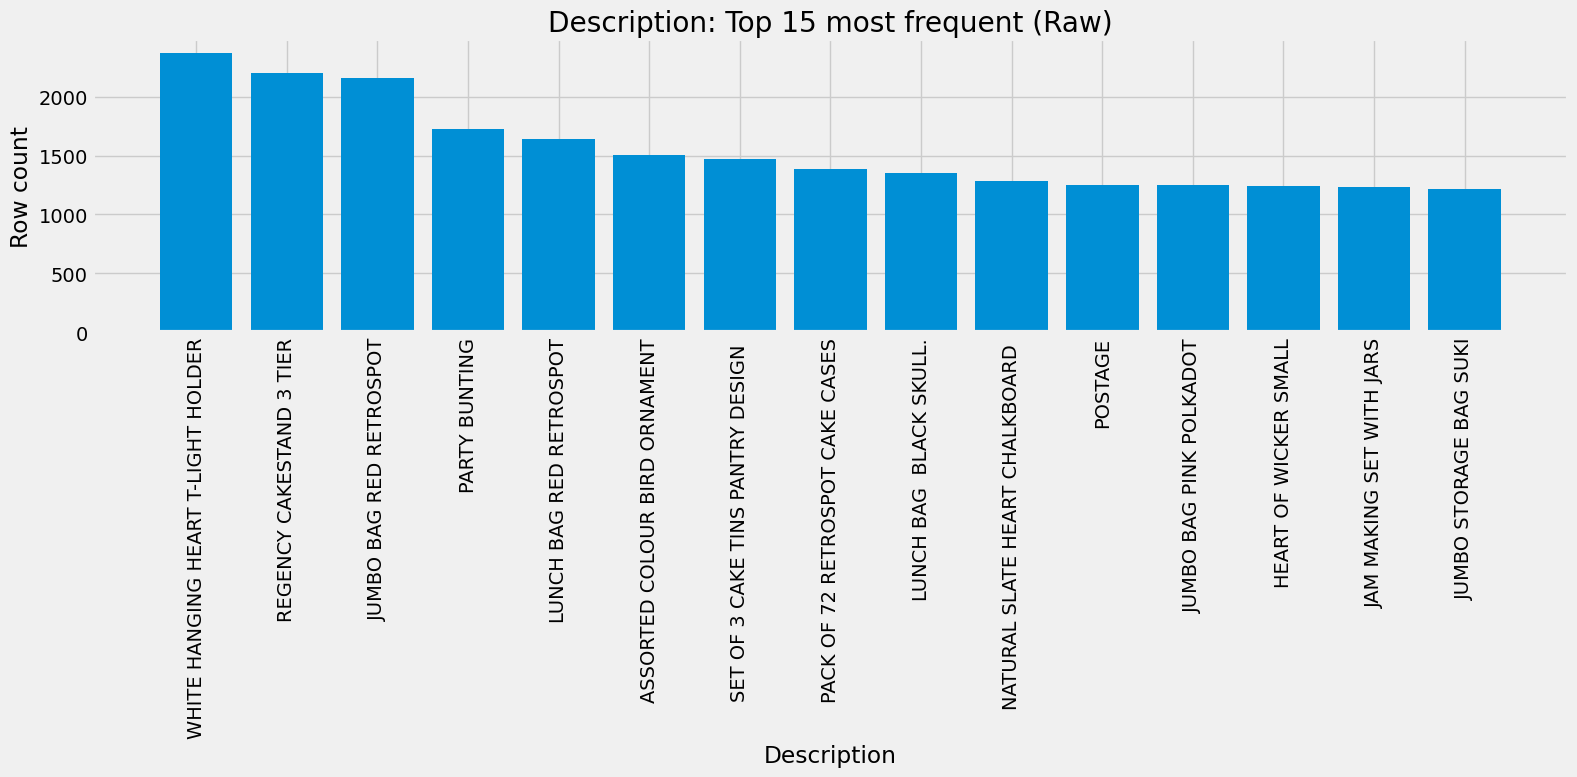

In [27]:
# Most Frequent Descriptions (Top 15 — Excluding NaN)
top_desc = df['Description'].dropna().value_counts().head(15)

plt.figure()
plt.bar(top_desc.index.astype(str), top_desc.values)
plt.title("Description: Top 15 most frequent (Raw)")
plt.xlabel("Description")
plt.ylabel("Row count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Chart Interpretation:

POSTAGE — 1252

This is a very clear signal:

The Description column contains a mix of product and non-product entries.

It directly aligns with the patterns observed in the StockCode column.


In [28]:

df['Description'].str.len().describe()

#Checking whether there are excessively short or excessively long descriptions.

count    540455.00000
mean         26.64378
std           5.45016
min           1.00000
25%          23.00000
50%          27.00000
75%          31.00000
max          35.00000
Name: Description, dtype: float64

Code Interpretation:

min = 1 | max = 35 | mean ≈ 26

📌 This indicates that:

There are no extremely short or excessively long descriptions.

The overall format is generally consistent.

No strong variation signal is observed.

However:

Minor spelling variations may still exist for the same product.

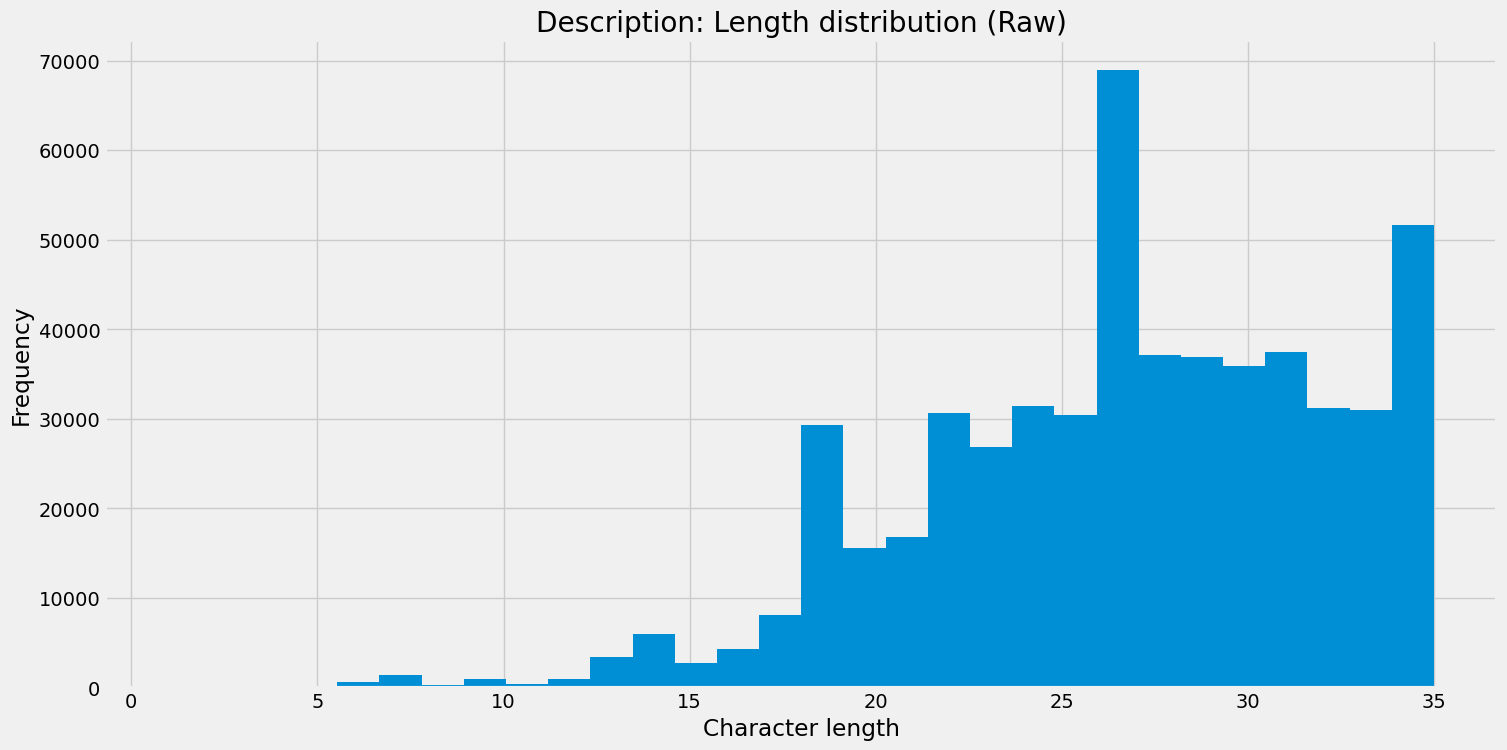

In [29]:
# Description Length Distribution (Excluding NaN)
desc_len = df['Description'].dropna().astype(str).str.len()

plt.figure()
plt.hist(desc_len, bins=30)
plt.title("Description: Length distribution (Raw)")
plt.xlabel("Character length")
plt.ylabel("Frequency")
plt.show()

#### 📝 Description — Notes

- Textual product description
- Contains **1,454 NaN values** (expected)
- Includes non-product descriptions (e.g., **POSTAGE**)
- Not fully reliable as a primary product identifier
- Not cleaned at this stage


### 4️⃣ Quantity

In [30]:
df['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

The standard deviation is very high.

The minimum and maximum values are symmetric and extremely large.

📌 This does not represent normal sales behavior.

In [31]:
#Are there any negative values?

(df['Quantity'] < 0).sum()


10624

In [32]:
(df['Quantity'] == 0).sum()


0

In [33]:
# Largest Quantities (Are They Outliers?)

df.sort_values('Quantity', ascending=False).head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,13256.0,United Kingdom
74614,542504,37413,NaN,5568,1/28/2011 12:03,0.00,NaN,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/2011 12:26,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,5/27/2011 10:52,0.72,13135.0,United Kingdom
220843,556231,85123A,?,4000,6/9/2011 15:04,0.00,NaN,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2/22/2011 10:43,0.82,18087.0,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,7/19/2011 17:04,0.06,14609.0,United Kingdom
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,4/18/2011 13:20,2.10,15749.0,United Kingdom


Code Interpretation:

🔍 Let’s examine the details:
For the transaction with a quantity of 80,995:

InvoiceNo: 581483

StockCode: PAPER CRAFT , LITTLE BIRDIE

UnitPrice: 2.08

📌 This does not reflect typical retail behavior.
It is likely due to:

Wholesale activity

System adjustment

Data entry error

⚠️ Additionally, there are rows where UnitPrice = 0.00.                 

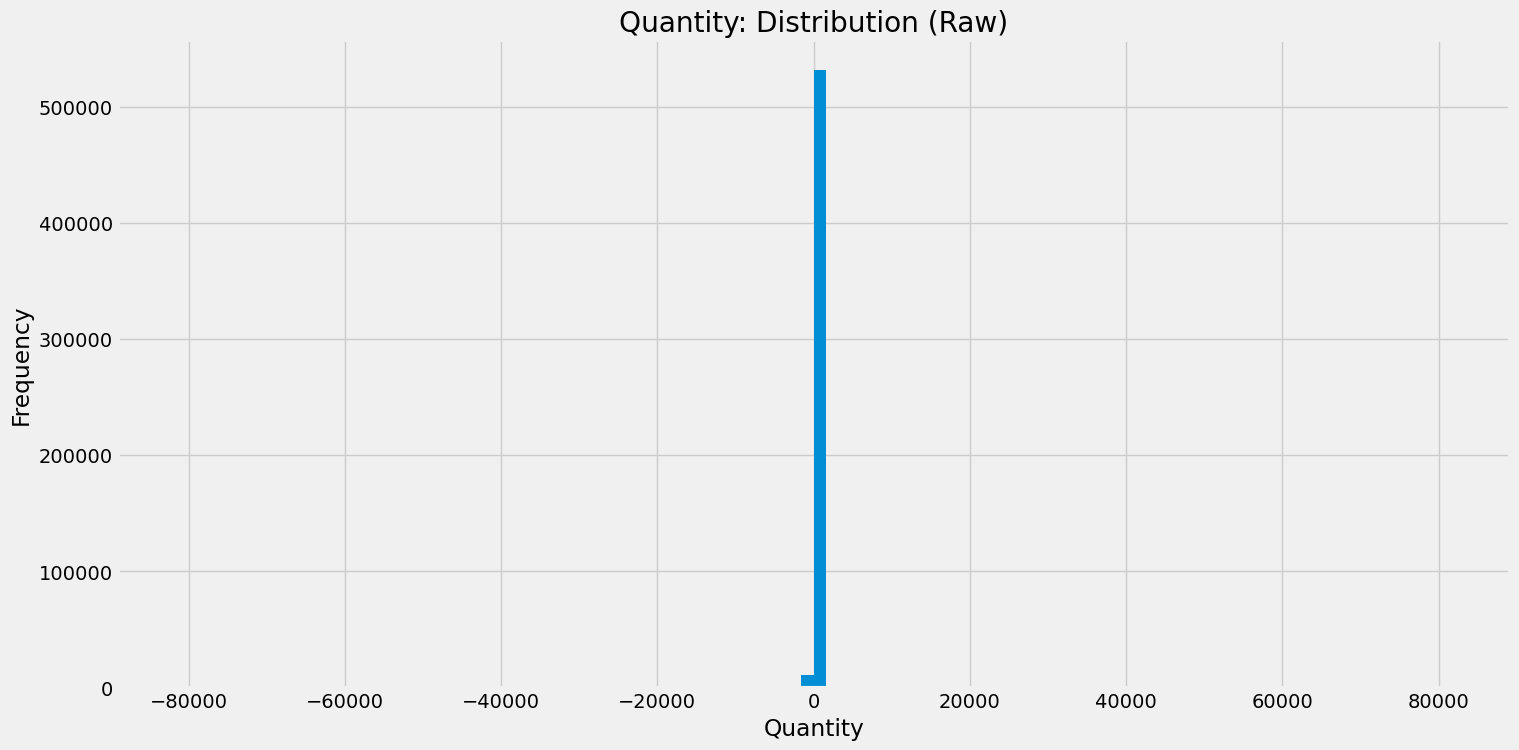

In [34]:
# Quantity Histogram (Raw — Outliers May Compress the Visualization)
plt.figure()
plt.hist(df['Quantity'], bins=100)
plt.title("Quantity: Distribution (Raw)")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

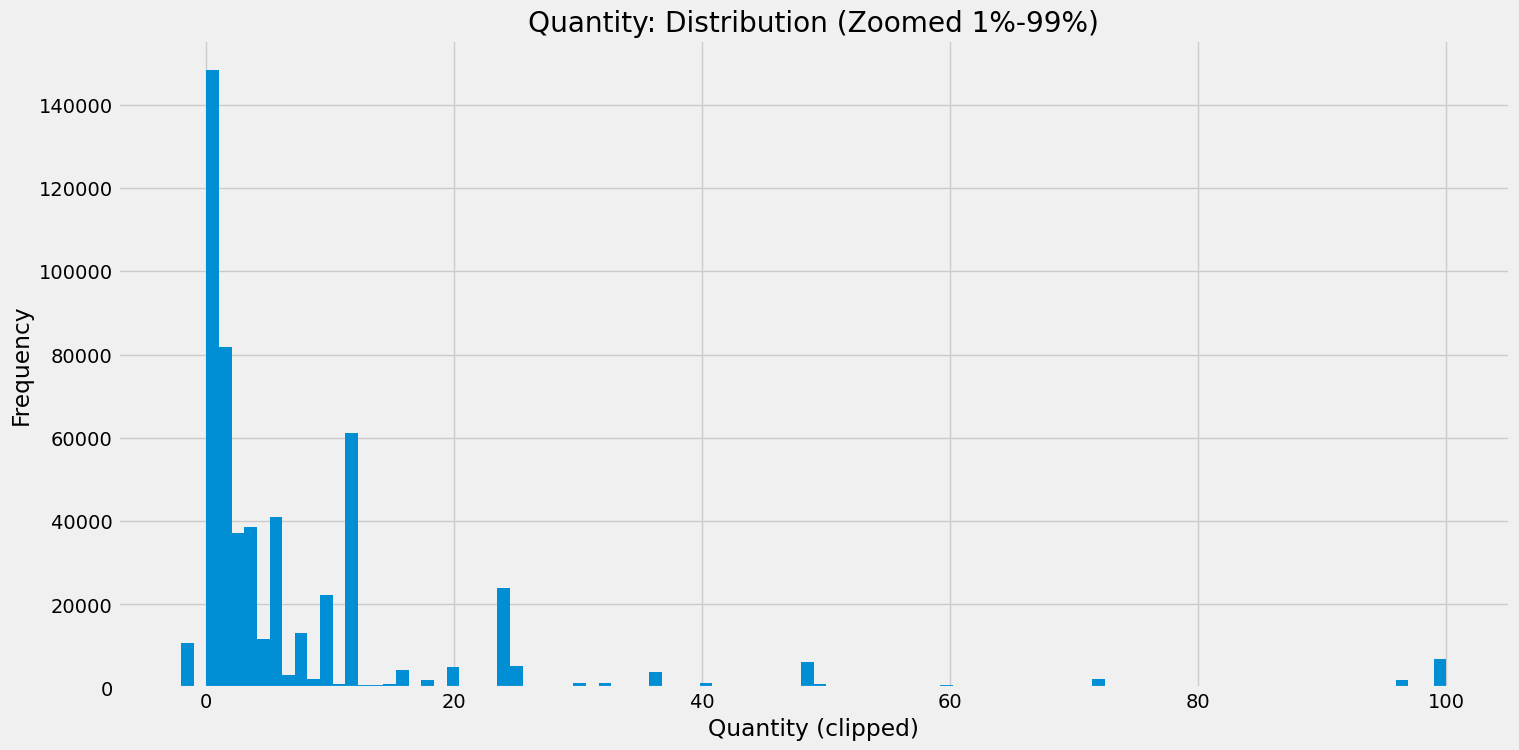

In [35]:
# Zoomed View for Better Outlier Visualization (1%–99% Trimming)
q_low = df['Quantity'].quantile(0.01)
q_high = df['Quantity'].quantile(0.99)
q_clip = df['Quantity'].clip(q_low, q_high)

plt.figure()
plt.hist(q_clip, bins=100)
plt.title("Quantity: Distribution (Zoomed 1%-99%)")
plt.xlabel("Quantity (clipped)")
plt.ylabel("Frequency")
plt.show()

In [36]:
# Relationship Between Negative Quantity and InvoiceNo

df[df['Quantity'] < 0][['InvoiceNo','StockCode','Quantity','Description']].head(10)


,InvoiceNo,StockCode,Quantity,Description
141,C536379,D,-1,Discount
154,C536383,35004C,-1,SET OF 3 COLOURED FLYING DUCKS
235,C536391,22556,-12,PLASTERS IN TIN CIRCUS PARADE
236,C536391,21984,-24,PACK OF 12 PINK PAISLEY TISSUES
237,C536391,21983,-24,PACK OF 12 BLUE PAISLEY TISSUES
238,C536391,21980,-24,PACK OF 12 RED RETROSPOT TISSUES
239,C536391,21484,-12,CHICK GREY HOT WATER BOTTLE
240,C536391,22557,-12,PLASTERS IN TIN VINTAGE PAISLEY
241,C536391,22553,-24,PLASTERS IN TIN SKULLS
939,C536506,22960,-6,JAM MAKING SET WITH JARS


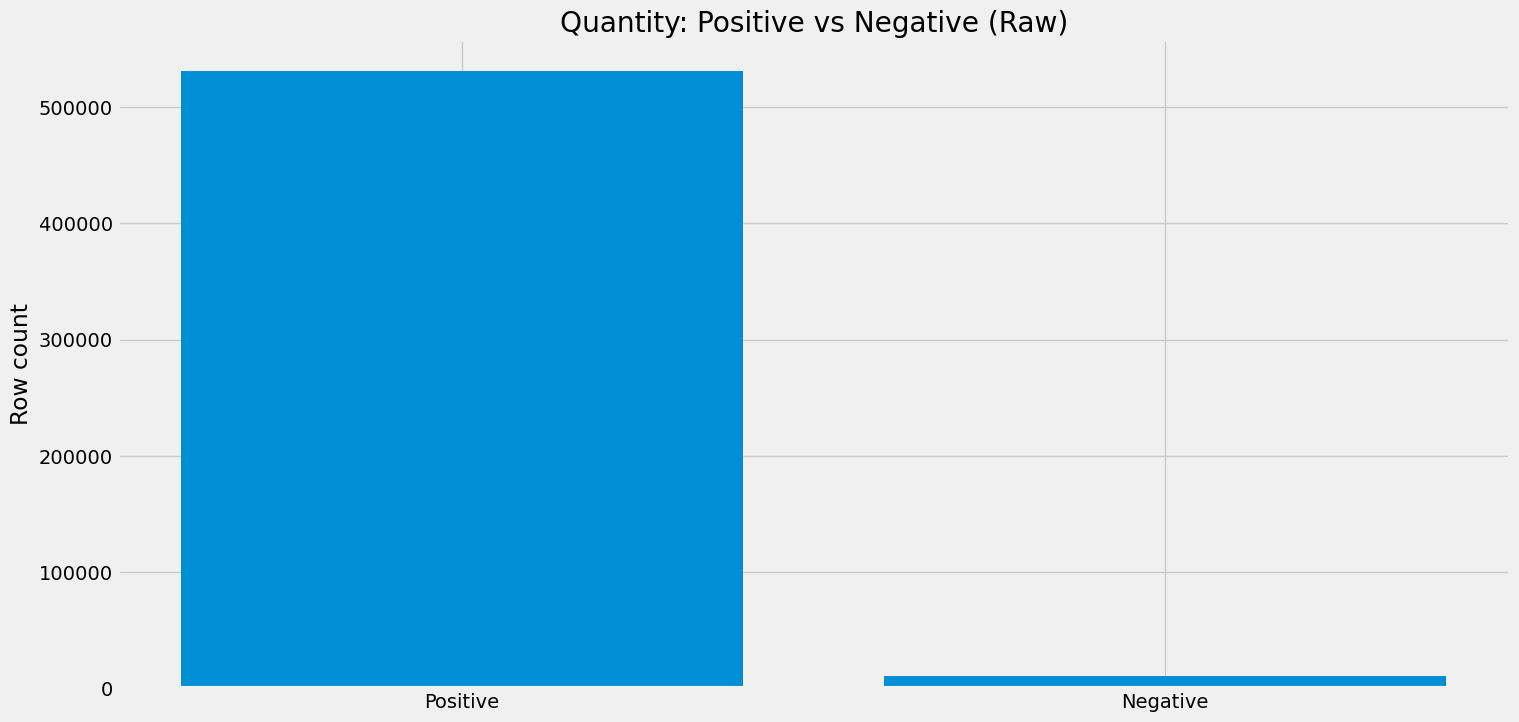

In [37]:
# Count of Negative vs. Positive Quantities
neg = (df['Quantity'] < 0).sum()
pos = (df['Quantity'] > 0).sum()

plt.figure()
plt.bar(['Positive', 'Negative'], [pos, neg])
plt.title("Quantity: Positive vs Negative (Raw)")
plt.ylabel("Row count")
plt.show()

#### 📦 Quantity — Notes

- Contains **10,624 negative values**, representing return transactions
- Extremely large values are present (outliers)
- Not removed at this stage


### 5️⃣ InvoiceDate


In [38]:
df['InvoiceDate'].head(10)

0    12/1/2010 8:26
1    12/1/2010 8:26
2    12/1/2010 8:26
3    12/1/2010 8:26
4    12/1/2010 8:26
5    12/1/2010 8:26
6    12/1/2010 8:26
7    12/1/2010 8:28
8    12/1/2010 8:28
9    12/1/2010 8:34
Name: InvoiceDate, dtype: object

In [39]:

pd.api.types.is_datetime64_any_dtype(df['InvoiceDate'])


False

In [40]:
# Safely Converting InvoiceDate to Datetime

df['InvoiceDate'] = pd.to_datetime(
    df['InvoiceDate'],
    errors='coerce',
    dayfirst=False
)


In [41]:
df['InvoiceDate'].dtype

dtype('<M8[ns]')

In [42]:
# How many dates could not be converted?

df['InvoiceDate'].isna().sum()


0

In [43]:
#Date Range

df['InvoiceDate'].min(), df['InvoiceDate'].max()


(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [44]:
df['InvoiceDate'].dt.year.value_counts().sort_index()


2010     42481
2011    499428
Name: InvoiceDate, dtype: int64

In [45]:
df['InvoiceDate'].dt.hour.value_counts().sort_index().head(10)


6        41
7       383
8      8909
9     34332
10    49037
11    57674
12    78709
13    72259
14    67471
15    77519
Name: InvoiceDate, dtype: int64

In [46]:

df['InvoiceDate'].dt.month.value_counts().sort_index()


1     35147
2     27707
3     36748
4     29916
5     37030
6     36874
7     39518
8     35284
9     50226
10    60742
11    84711
12    68006
Name: InvoiceDate, dtype: int64

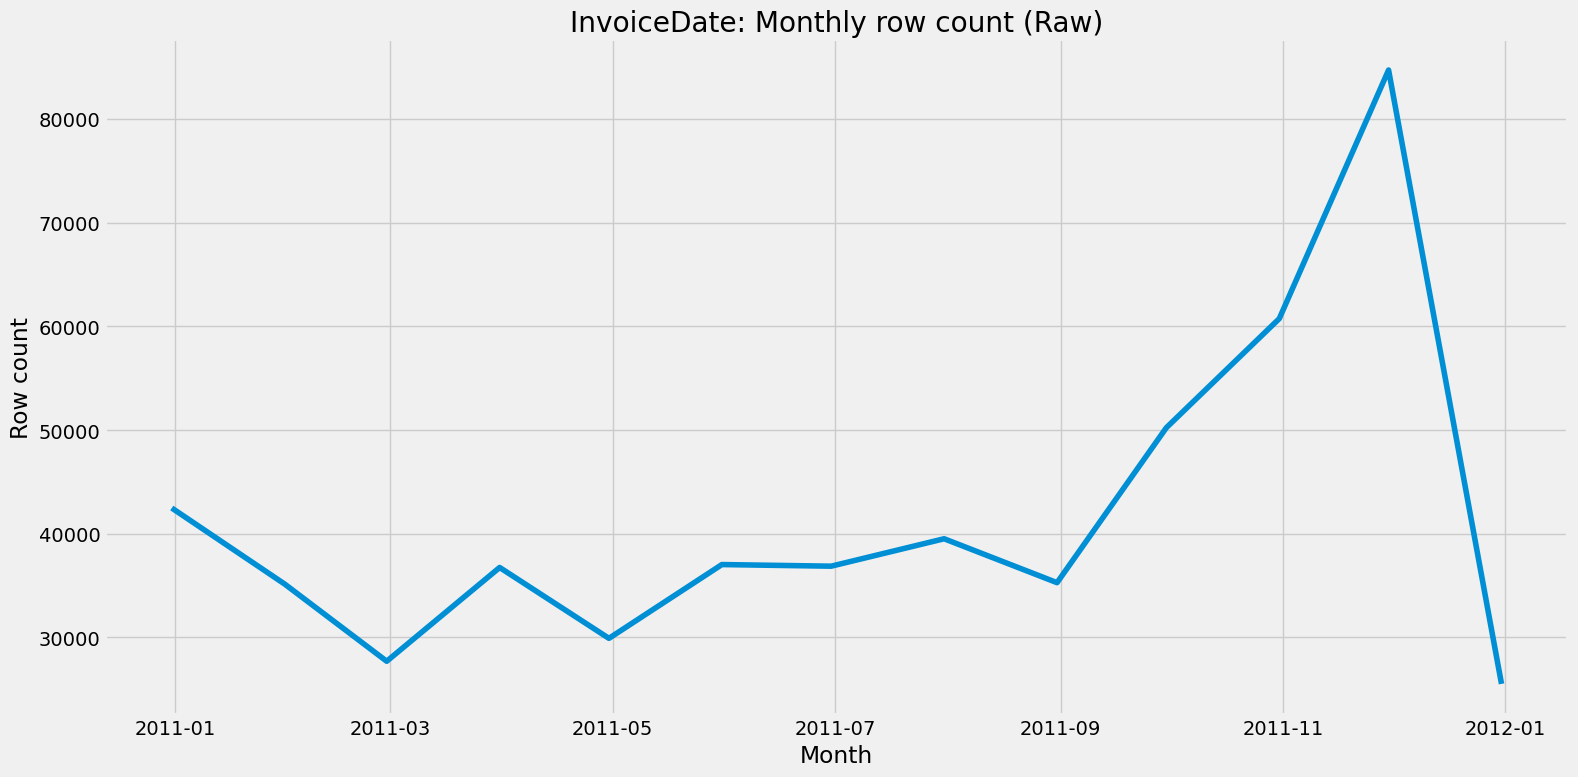

In [47]:
# Monthly Transaction Count (Row Count)
monthly = df.set_index('InvoiceDate').resample('M').size()

plt.figure()
plt.plot(monthly.index, monthly.values)
plt.title("InvoiceDate: Monthly row count (Raw)")
plt.xlabel("Month")
plt.ylabel("Row count")
plt.tight_layout()
plt.show()

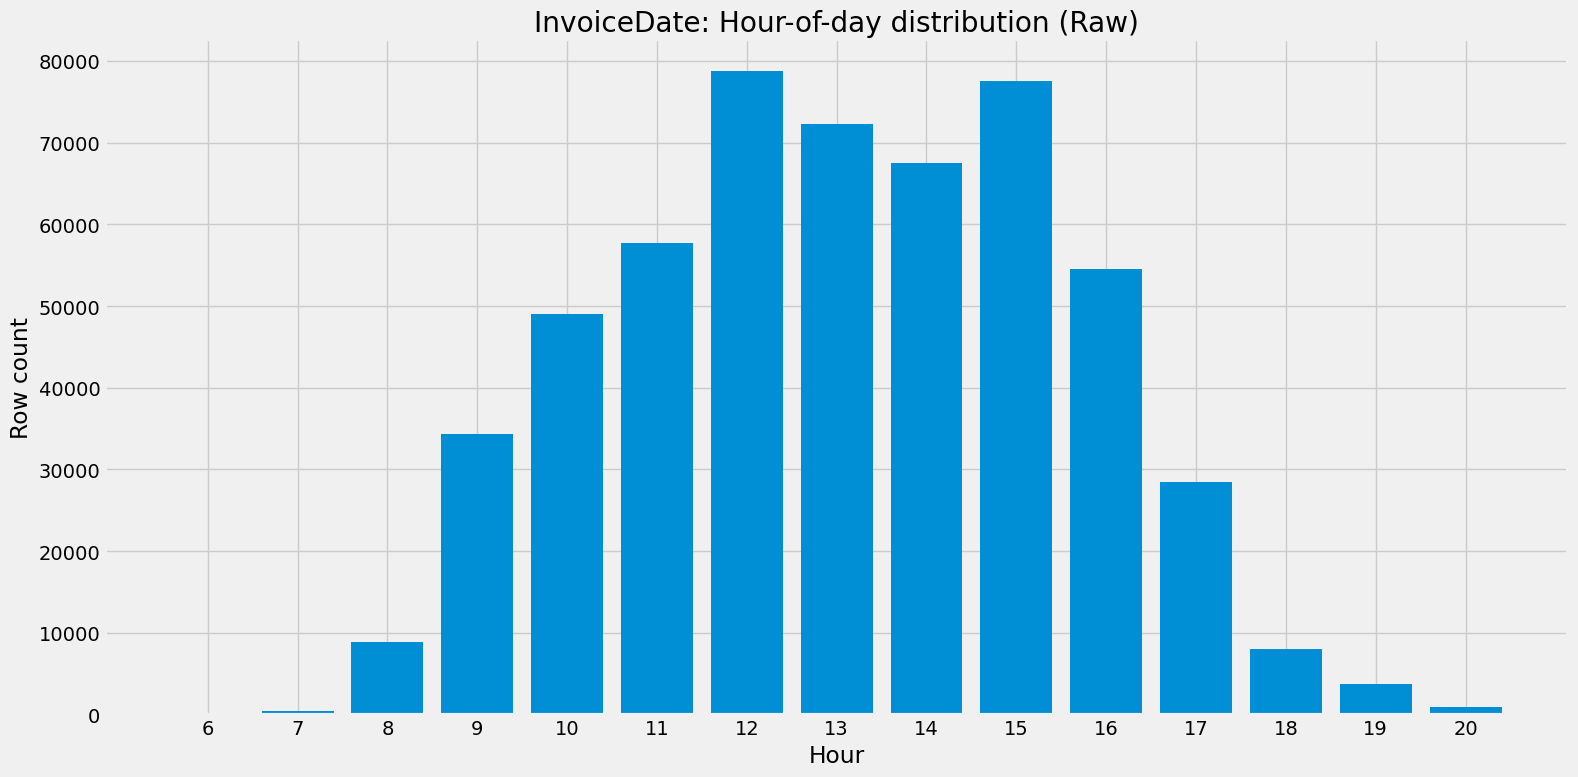

In [48]:
# Hourly Distribution (Row Count)
hourly = df['InvoiceDate'].dt.hour.value_counts().sort_index()

plt.figure()
plt.bar(hourly.index.astype(str), hourly.values)
plt.title("InvoiceDate: Hour-of-day distribution (Raw)")
plt.xlabel("Hour")
plt.ylabel("Row count")
plt.tight_layout()
plt.show()

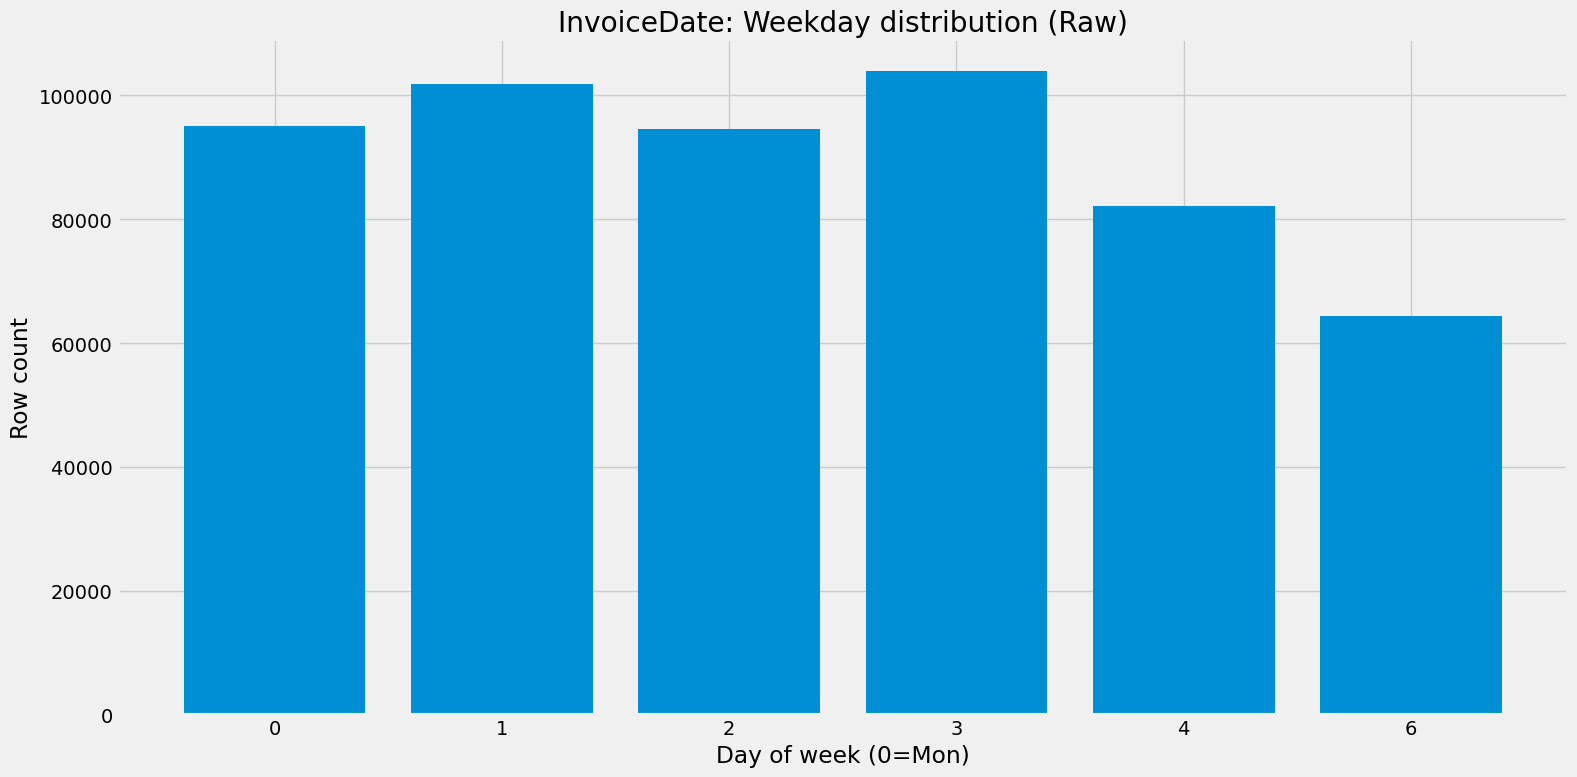

In [49]:
# Day of Week Distribution (0 = Mon ... 6 = Sun)
weekday = df['InvoiceDate'].dt.dayofweek.value_counts().sort_index()

plt.figure()
plt.bar(weekday.index.astype(str), weekday.values)
plt.title("InvoiceDate: Weekday distribution (Raw)")
plt.xlabel("Day of week (0=Mon)")
plt.ylabel("Row count")
plt.tight_layout()
plt.show()

####  📅 InvoiceDate — Processing Notes

- Initially loaded as **object** type → converted to **datetime64[ns]**
- Converted using `pd.to_datetime` (`dayfirst=False`)
- Invalid date values checked using `errors='coerce'`
- No missing datetime values (**NaT = 0**)
- Date range: **2010-12-01 — 2011-12-09**
- Includes time information, enabling time-based analysis


### 6️⃣ UnitPrice


In [50]:
df['UnitPrice'].describe()


count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

🔴 
The standard deviation is very high.
There are extreme negative and positive values.

This indicates that UnitPrice:

Mostly consists of small price values

But also includes highly abnormal records.

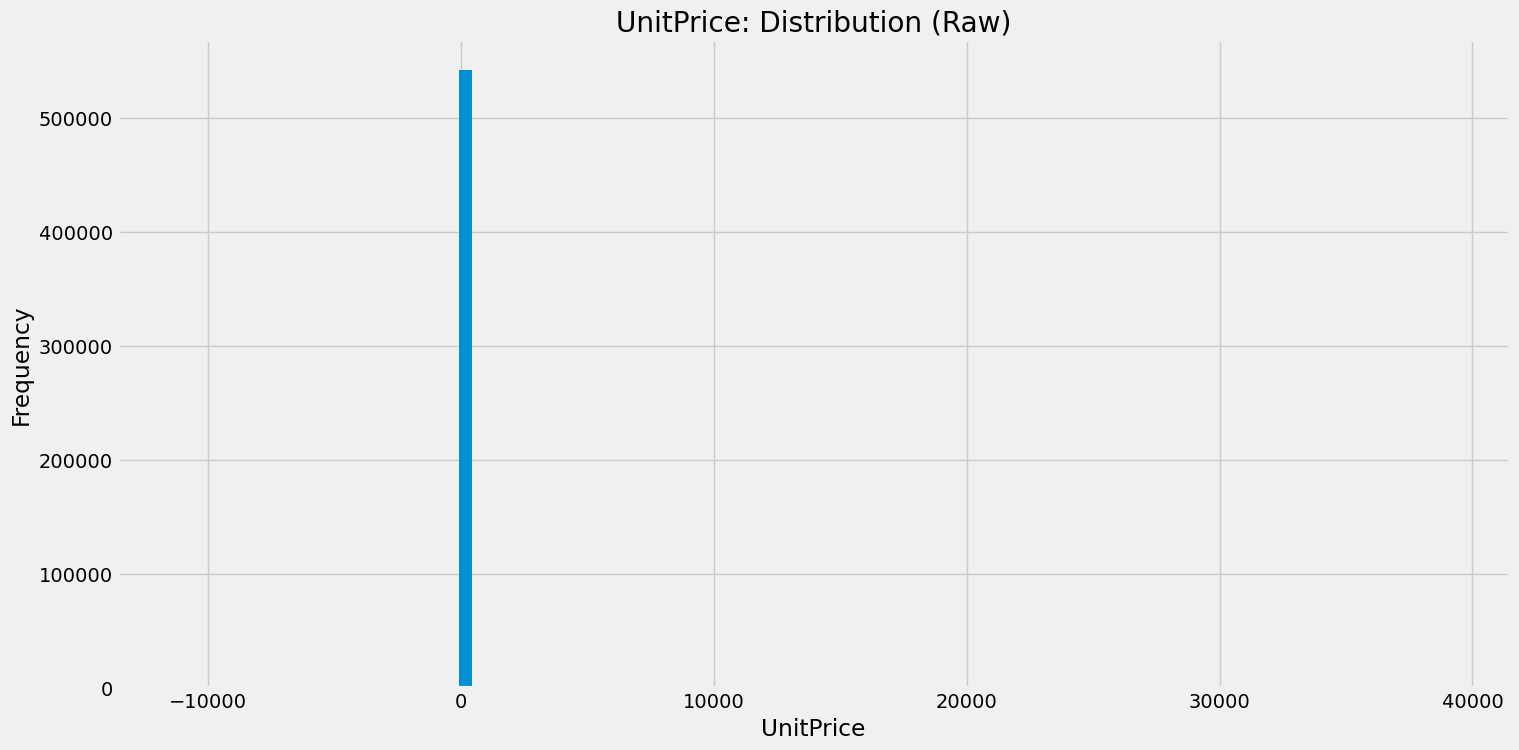

In [51]:
# UnitPrice Histogram (Raw — Outliers May Compress the Visualization)
plt.figure()
plt.hist(df['UnitPrice'], bins=100)
plt.title("UnitPrice: Distribution (Raw)")
plt.xlabel("UnitPrice")
plt.ylabel("Frequency")
plt.show()

In [52]:
# Are there any zero prices?

(df['UnitPrice'] == 0).sum()


2515

Common characteristics observed in the samples:

Description = NaN

CustomerID = NaN

Country = United Kingdom

Quantity > 0

This reveals a very clear pattern:

These are not real sales transactions, but rather system-generated or accounting-related records.

In [53]:
# Are there any negative prices?

(df['UnitPrice'] < 0).sum()


2

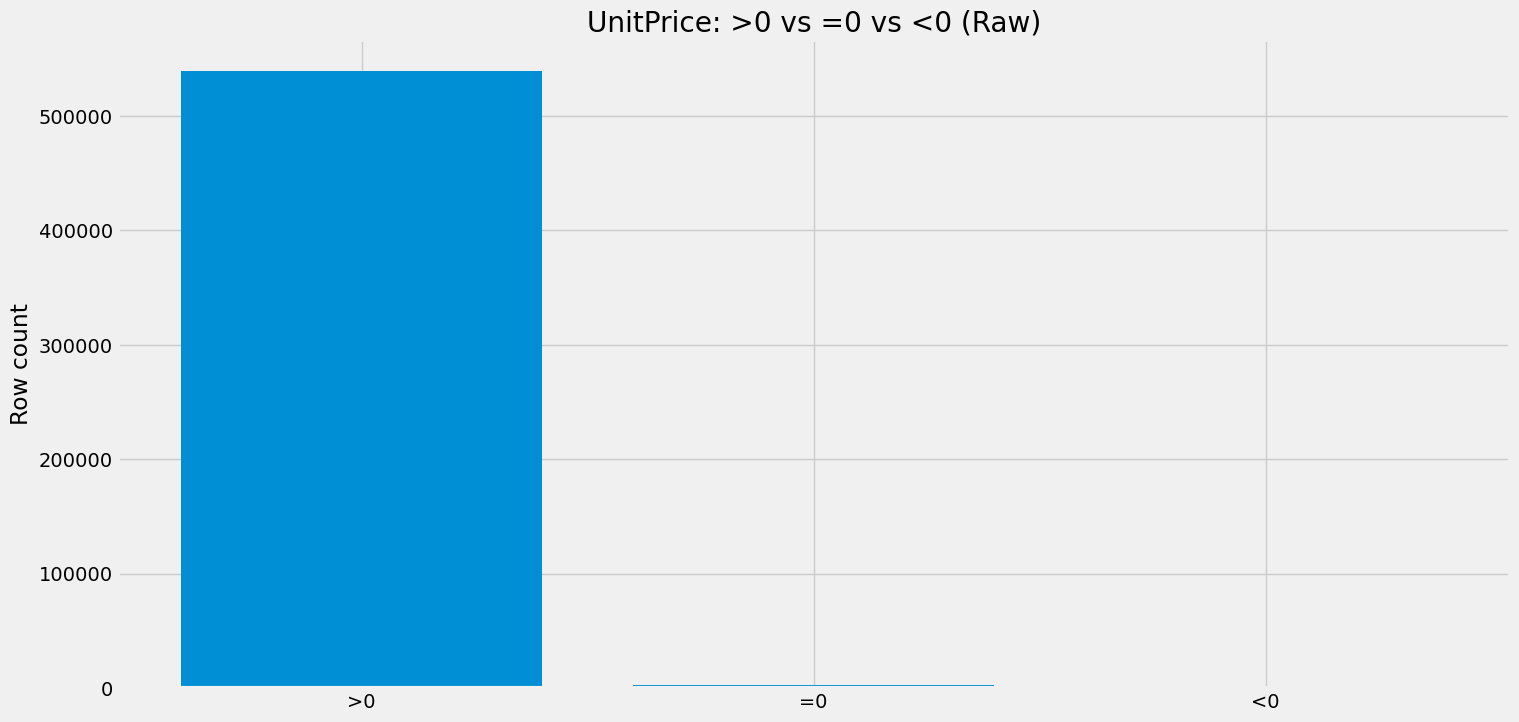

In [54]:
# Distribution of Zero vs. Positive vs. Negative Values
n_zero = (df['UnitPrice'] == 0).sum()
n_pos = (df['UnitPrice'] > 0).sum()
n_neg = (df['UnitPrice'] < 0).sum()

plt.figure()
plt.bar(['>0', '=0', '<0'], [n_pos, n_zero, n_neg])
plt.title("UnitPrice: >0 vs =0 vs <0 (Raw)")
plt.ylabel("Row count")
plt.show()

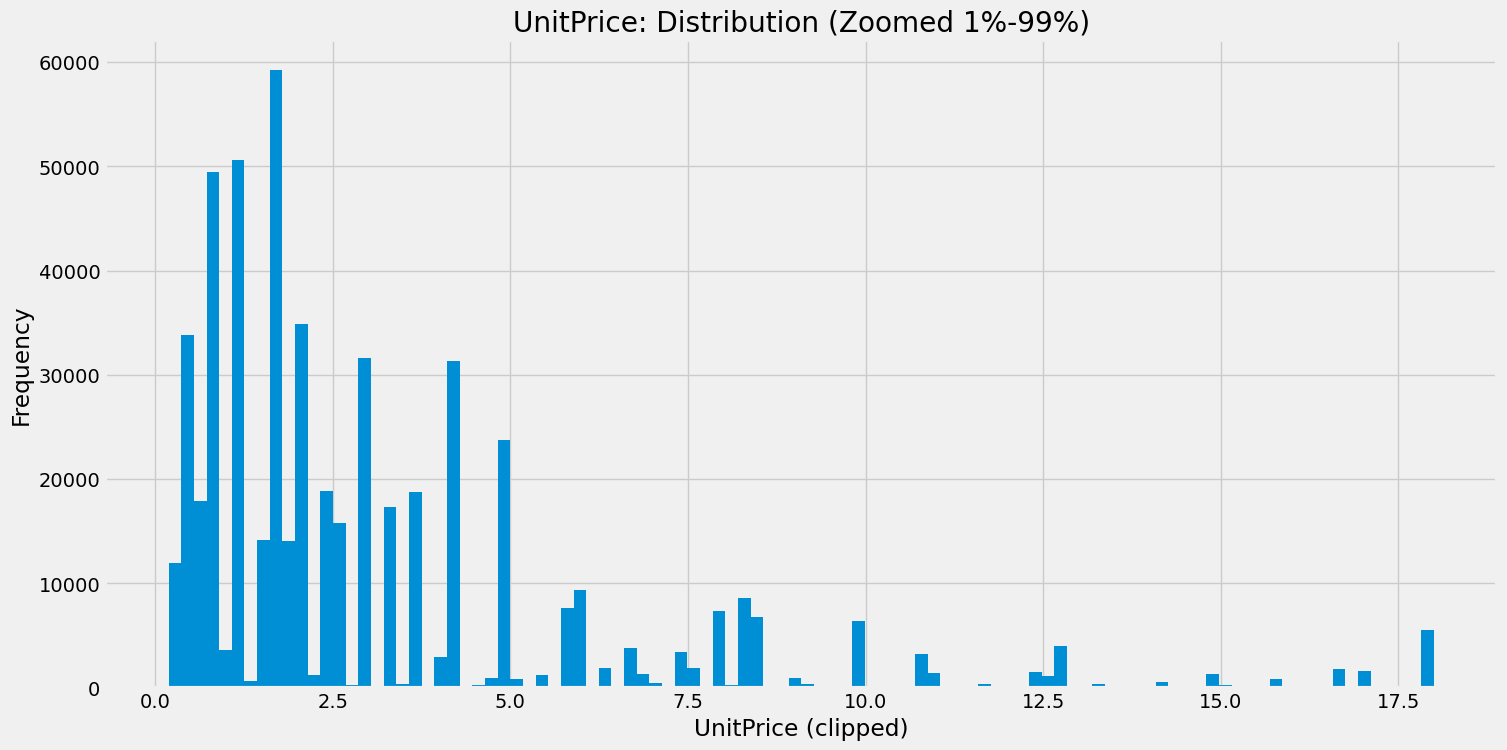

In [55]:
# More Readable Distribution with Zoom (1%–99% Trimming)
p_low = df['UnitPrice'].quantile(0.01)
p_high = df['UnitPrice'].quantile(0.99)
p_clip = df['UnitPrice'].clip(p_low, p_high)

plt.figure()
plt.hist(p_clip, bins=100)
plt.title("UnitPrice: Distribution (Zoomed 1%-99%)")
plt.xlabel("UnitPrice (clipped)")
plt.ylabel("Frequency")
plt.show()

- 📌 This is likely either a data entry error or an accounting adjustment.
- A product price cannot be negative.

In [56]:
# Top 10 highest UnitPrice rows (outlier check)

df.sort_values('UnitPrice', ascending=False)[
    ['InvoiceNo','StockCode','Description','Quantity','UnitPrice','CustomerID','Country']
].head(10)


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,38970.00,15098.0,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,17836.46,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,16453.71,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,13541.33,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,13541.33,NaN,United Kingdom
15016,C537630,AMAZONFEE,AMAZON FEE,-1,13541.33,NaN,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,13474.79,NaN,United Kingdom
524601,C580604,AMAZONFEE,AMAZON FEE,-1,11586.50,NaN,United Kingdom
299982,A563185,B,Adjust bad debt,1,11062.06,NaN,United Kingdom


In [57]:
# What do rows with UnitPrice = 0 look like?

df[df['UnitPrice'] == 0][
    ['InvoiceNo','StockCode','Description','Quantity','UnitPrice','CustomerID','Country']
].head(20)


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,0.0,NaN,United Kingdom
2025,536553,37461,NaN,3,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,0.0,NaN,United Kingdom
2406,536589,21777,NaN,-10,0.0,NaN,United Kingdom


In [58]:
# Negative UnitPrice values must be removed.
df = df[df['UnitPrice'] >= 0]


In [59]:
# Rows with UnitPrice = 0 should be removed for product and revenue analysis.
df = df[df['UnitPrice'] > 0]


#### UnitPrice — Notes

- Average price ≈ **4.6**
- **2 negative price values** detected (erroneous records)
- **2,515 rows with zero price**, likely system-generated entries
- Zero and negative values were removed for product analysis



### 7️⃣ CustomerID


In [60]:
# Are there any missing CustomerID values? (Critical Check)

df['CustomerID'].isna().sum()


132603

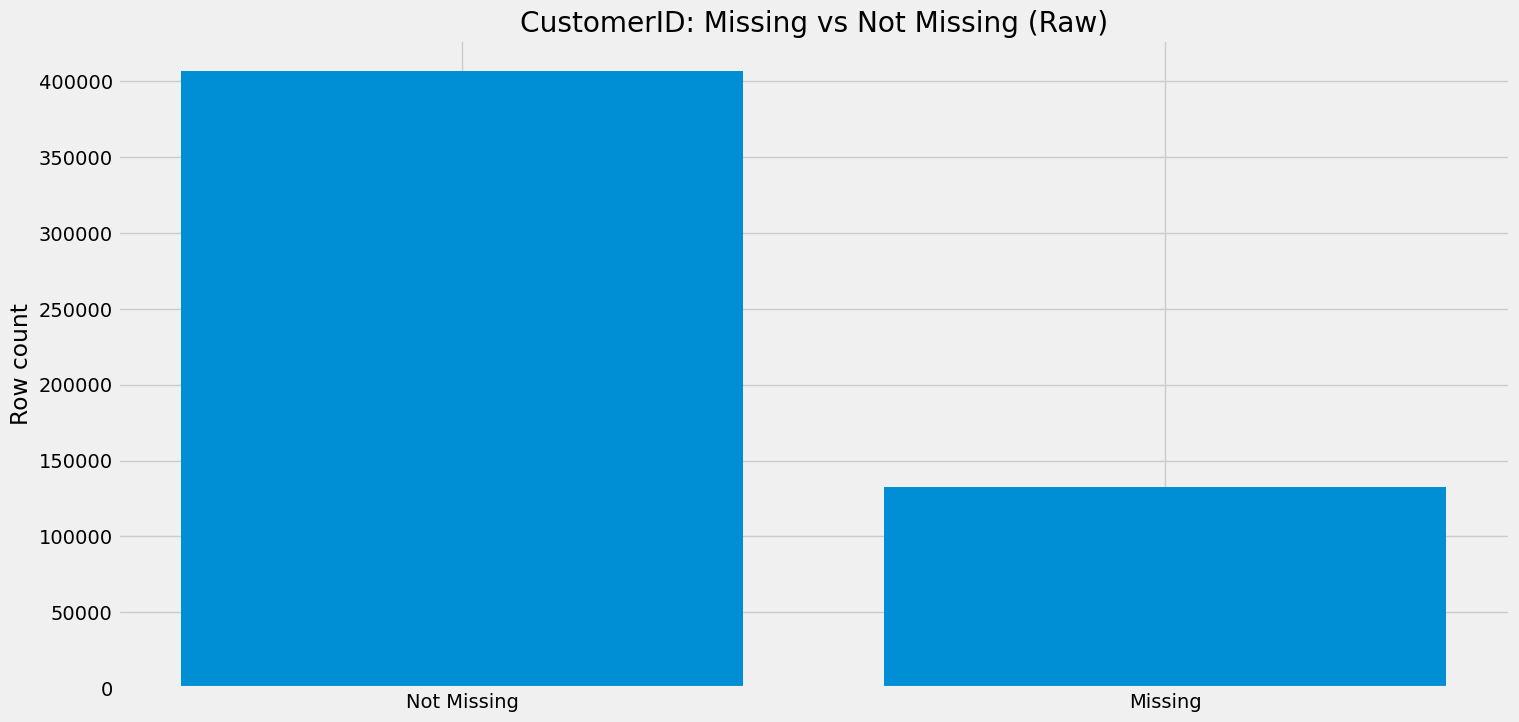

In [61]:
# Is CustomerID missing or complete?
cid_missing = df['CustomerID'].isna().value_counts()

plt.figure()
plt.bar(['Not Missing', 'Missing'], [cid_missing.get(False, 0), cid_missing.get(True, 0)])
plt.title("CustomerID: Missing vs Not Missing (Raw)")
plt.ylabel("Row count")
plt.show()

In [62]:
#How many unique customers are there?

df['CustomerID'].nunique()


4371

In [63]:

df['CustomerID'].dropna().apply(float.is_integer).value_counts()


True    406789
Name: CustomerID, dtype: int64

In [64]:
# Most Frequent Customers (by Purchase Frequency)

df['CustomerID'].value_counts().head(10)


17841.0    7983
14911.0    5901
14096.0    5128
12748.0    4641
14606.0    2782
15311.0    2491
14646.0    2081
13089.0    1857
13263.0    1677
14298.0    1640
Name: CustomerID, dtype: int64

Code Interpretation:

17841 → 7,983 transactions

14911 → 5,903 transactions

...

This suggests:

A strong B2B / wholesale customer signal

Highly valuable for customer segmentation

However:

These customers may act as outliers in K-Means clustering

Likely to fall into the Champions segment in RFM analysis.

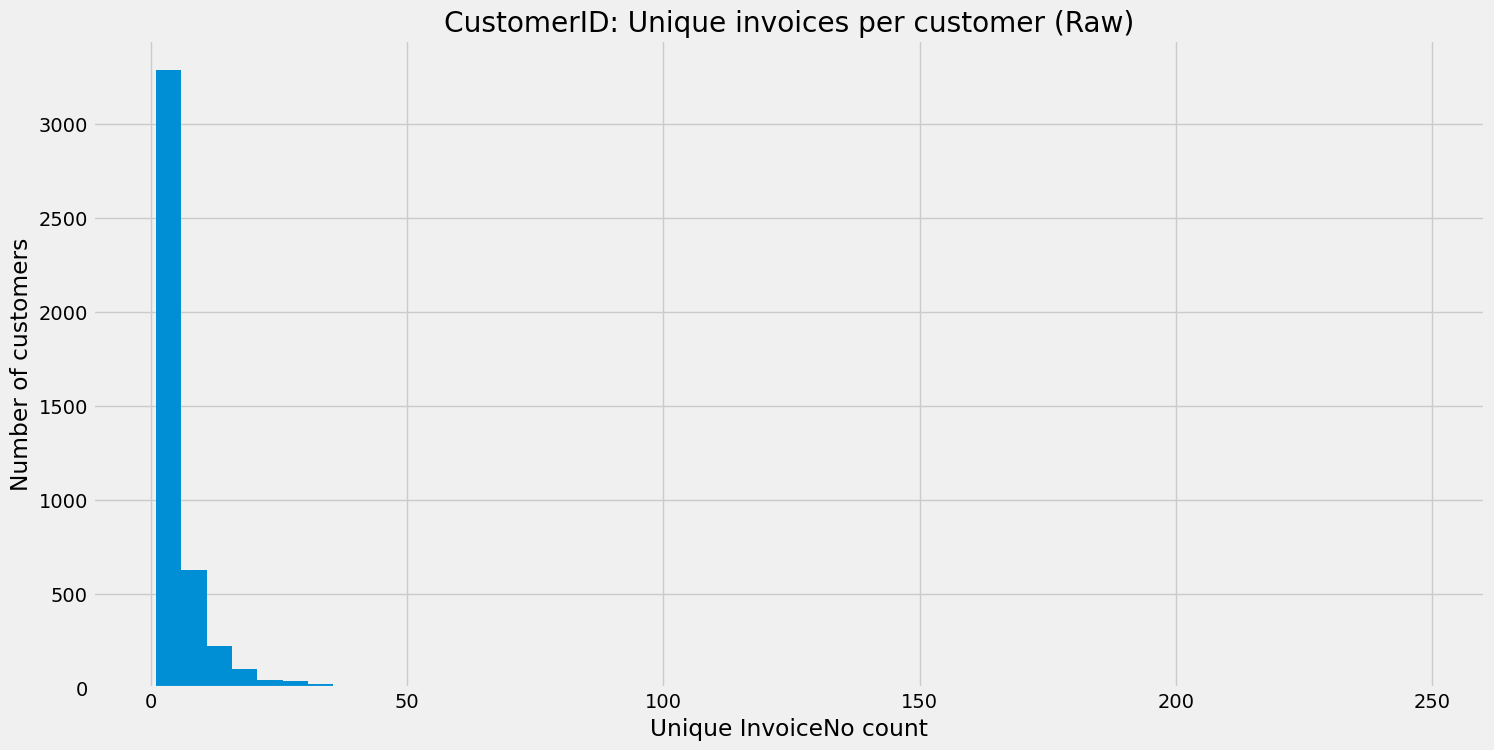

In [65]:
# How Many Invoices per Customer?
#Note: Rows with NaN CustomerID are excluded.
cust_invoices = (
    df.dropna(subset=['CustomerID'])
      .groupby('CustomerID')['InvoiceNo']
      .nunique()
)

plt.figure()
plt.hist(cust_invoices, bins=50)
plt.title("CustomerID: Unique invoices per customer (Raw)")
plt.xlabel("Unique InvoiceNo count")
plt.ylabel("Number of customers")
plt.show()

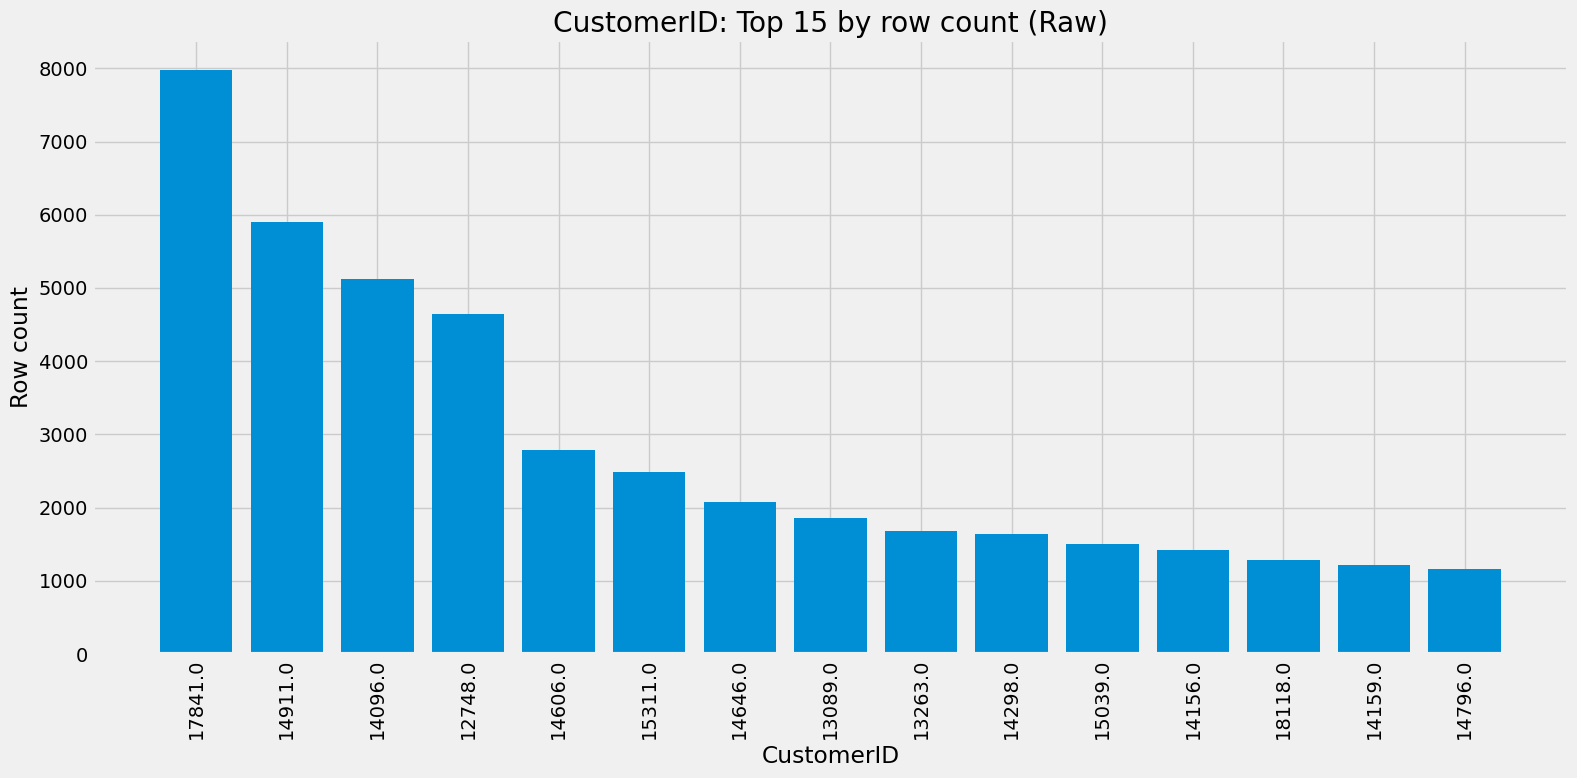

In [66]:
# Top 15 Customers with the Most Rows
top_customers = df['CustomerID'].value_counts().head(15)

plt.figure()
plt.bar(top_customers.index.astype(str), top_customers.values)
plt.title("CustomerID: Top 15 by row count (Raw)")
plt.xlabel("CustomerID")
plt.ylabel("Row count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [67]:
# What do rows with missing CustomerID look like?
df[df['CustomerID'].isna()][
    ['InvoiceNo','StockCode','Description','Quantity','UnitPrice','Country']
].head(10)


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2.51,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2.51,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,0.85,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,1.66,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,1.66,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2.51,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,0.43,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,0.43,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,0.43,United Kingdom
1452,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,2.51,United Kingdom


#### 👤 CustomerID — Notes

- **4,372 unique customers**
- **135,078 rows** contain missing CustomerID values (anonymous transactions)
- CustomerID is required for **RFM, K-Means, and CLV** analyses
- Rows with NaN CustomerID will be removed before modeling

###  Country


In [68]:

df['Country'].isna().sum()


0

In [69]:
# How many unique countries are there?

df['Country'].nunique()


38

In [70]:
# Country Distribution (Top 10)

df['Country'].value_counts().head(10)

#Not:Is there a dominant country?


United Kingdom    492979
Germany             9493
France              8556
EIRE                8192
Spain               2532
Netherlands         2367
Belgium             2069
Switzerland         2001
Portugal            1519
Australia           1256
Name: Country, dtype: int64

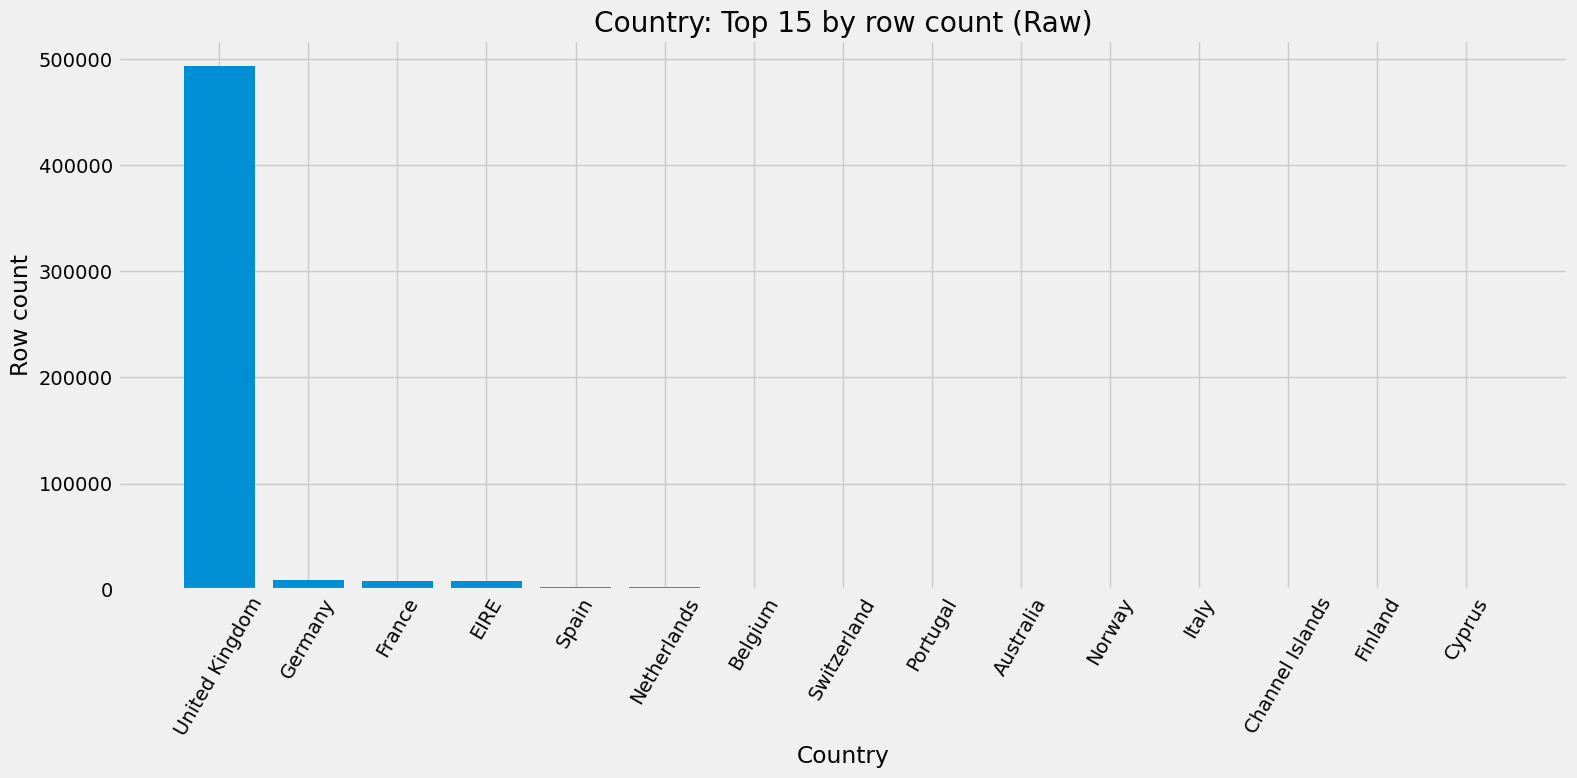

In [71]:
# Country Distribution (Top 15)
top_countries = df['Country'].value_counts().head(15)

plt.figure()
plt.bar(top_countries.index.astype(str), top_countries.values)
plt.title("Country: Top 15 by row count (Raw)")
plt.xlabel("Country")
plt.ylabel("Row count")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

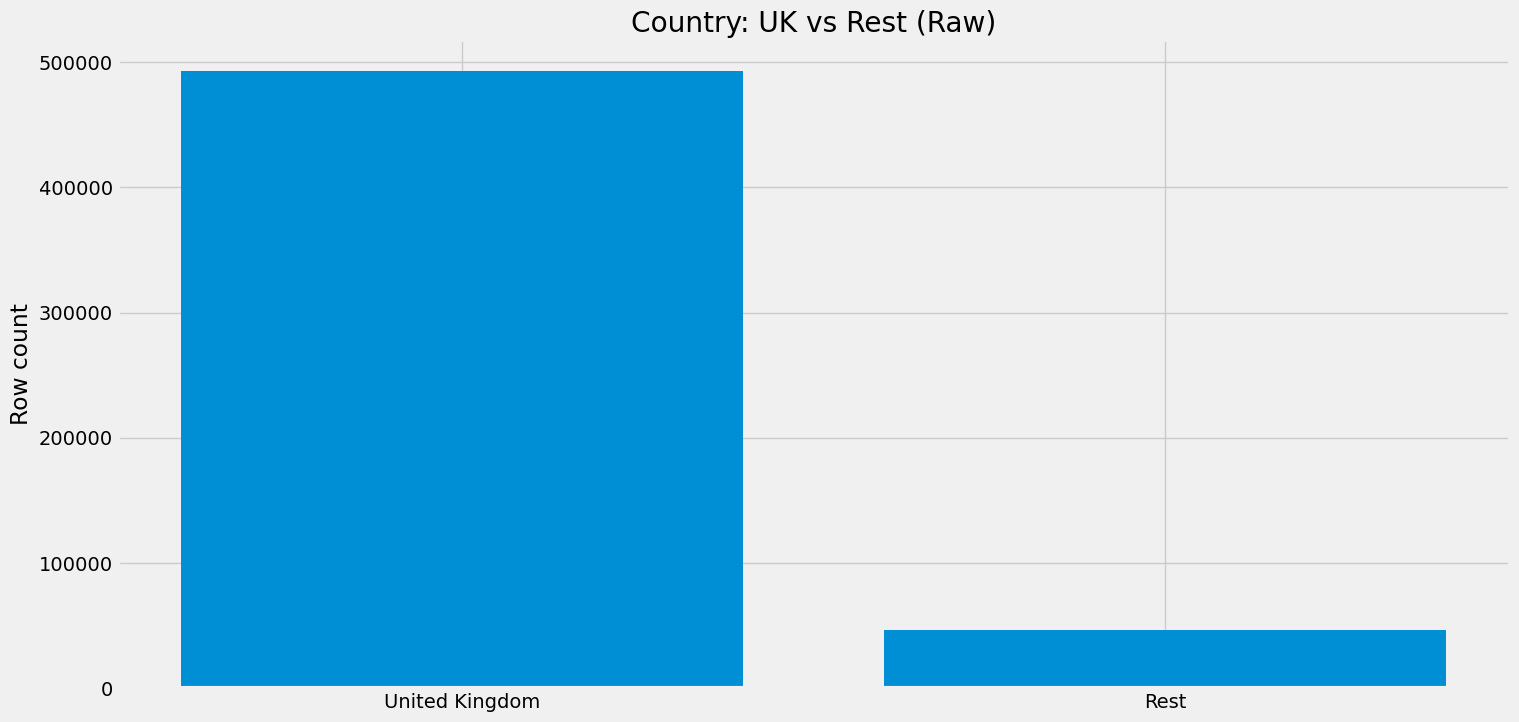

In [72]:
# United Kingdom vs. Other Countries
uk = (df['Country'] == 'United Kingdom').sum()
rest = (df['Country'] != 'United Kingdom').sum()

plt.figure()
plt.bar(['United Kingdom', 'Rest'], [uk, rest])
plt.title("Country: UK vs Rest (Raw)")
plt.ylabel("Row count")
plt.show()

In [73]:
# UK Sales Percentage
(df['Country'] == 'United Kingdom').mean()


0.913953117584243

In [74]:
# Relationship Between Country and CustomerID

df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head(10)


Country
United Kingdom    3949
Germany             95
France              87
Spain               31
Belgium             25
Switzerland         21
Portugal            19
Italy               15
Finland             12
Austria             11
Name: CustomerID, dtype: int64

#### 🌍 Country — Notes

- **38 countries** represented
- **91.4%** of transactions belong to the **United Kingdom**
- The UK is dominant in customer-level analysis
- Not used as a model input; will be utilized for segment interpretation


# Data Cleaning & Preprocessing


In [75]:
# 🧹  Working Dataset Copy

df_clean = df.copy()
df_clean.shape


(539392, 8)

In [76]:
#🧹 2️⃣ Remove Rows with NaN CustomerID

df_clean = df_clean[df_clean['CustomerID'].notna()]
df_clean.shape


(406789, 8)

In [77]:
#🧹  Quantity > 0 (Exclude Returns)
df_clean = df_clean[df_clean['Quantity'] > 0]
df_clean.shape


(397884, 8)

In [78]:
#🧹  UnitPrice > 0

df_clean = df_clean[df_clean['UnitPrice'] > 0]
df_clean.shape


(397884, 8)

In [79]:
#🧹  Remove Non-Product Codes

non_product_codes = ['POST', 'BANK CHARGES']

df_clean = df_clean[~df_clean['StockCode'].isin(non_product_codes)]
df_clean.shape


(396773, 8)

In [80]:
#🧮 Create Revenue Column

df_clean['Revenue'] = df_clean['Quantity'] * df_clean['UnitPrice']


In [81]:
# control
df_clean[['Quantity','UnitPrice','Revenue']].head()


,Quantity,UnitPrice,Revenue
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


In [82]:

df_clean.describe()


,Quantity,UnitPrice,CustomerID,Revenue
count,396773.000000,396773.000000,396773.000000,396773.000000
mean,13.016712,3.037353,15301.474543,22.263206
std,179.581829,17.829898,1709.862357,309.209895
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13975.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16801.000000,19.800000
max,80995.000000,4161.060000,18287.000000,168469.600000


In [83]:
df_clean.isna().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Revenue        0
dtype: int64

In [84]:
df_clean.shape

(396773, 9)

### ✅ Dataset Summary After Cleaning

- 📄 Row Count
- **396,773 rows** remaining  
- Initial dataset: **541,909 rows**  
→ Approximately **145K rows** removed during cleaning

- ✔ Missing Values
- No remaining **NaN values**

---

- 📊 Statistics (Cleaned Data)

**Quantity**
- min = **1** ✔  
- max = **80,995** ⚠ (likely wholesale customer activity)

**UnitPrice**
- min = **0.001** (likely symbolic pricing)  
- max = **4,161** ⚠ (high but valid — not negative)

**Revenue**
- min = **0.001**
- max = **168,469** ⚠ (influenced by wholesale transactions)


# Business Problem


Companies need to:

- Identify high-value customers
- Predict future customer value
- Optimize marketing spend
- Reduce churn risk

This project simulates a real-world CRM analytics workflow to address these challenges.

# RFM Segmentation

## 🎯 What is RFM Analysis?

**RFM = Recency, Frequency, Monetary**

RFM analysis is one of the most classical and powerful methods used to measure **customer value** based on purchasing behavior.

**Objective:**  
Identify which customers are valuable, which are at risk of churn, and which have growth potential.

---

## 🧠 1️⃣ Recency — How Recently Did the Customer Purchase?

**Definition:**  
Number of days since the customer’s last purchase.

In this analysis:


**Examples**
- 2 days → very recent customer
- 300 days → inactive customer

📌 **Lower Recency = better**  
📌 **Higher Recency = higher churn risk**

---

## 🧠 2️⃣ Frequency — How Often Does the Customer Purchase?

**Definition:**  
Number of unique invoices (`InvoiceNo`) per customer.

**Examples**
- 1 → one-time customer
- 7 → regular customer
- 209 → highly active customer

📌 **Higher Frequency = stronger loyalty**

---

## 🧠 3️⃣ Monetary — How Much Does the Customer Spend?

**Definition:**  
Total customer spending (**Revenue**).

**Examples**
- 300 → low-value customer
- 4,000 → medium-value customer
- 279,000 → VIP / wholesale customer

📌 **Higher Monetary value = higher customer value**

---

## 🎯 Why Perform RFM Analysis?

### 1️⃣ Customer Segmentation
RFM helps group customers based on purchasing behavior.

Example segments:

- 🟢 Champions
- 💎 Loyal Customers
- ⚠ At Risk
- 🔥 New Customers
- ❄ Lost Customers

---

### 2️⃣ Marketing Strategy Optimization

| Segment   | Recommended Action        |
|-----------|---------------------------|
| Champions | Exclusive campaigns       |
| At Risk   | Reminder emails           |
| Lost      | Win-back campaigns        |
| New       | Welcome discounts         |

---

### 3️⃣ Foundation for CLV Prediction

RFM can be considered a simplified proxy for **Customer Lifetime Value (CLV)**.

Customers who:
- purchase frequently,
- spend more,
- and bought recently

➡ are more likely to remain valuable in the future.


In [85]:
# Maximum date in the dataset:
df_clean['InvoiceDate'].max()


Timestamp('2011-12-09 12:50:00')

## 🔥RFM Preparation


In [86]:
# Reference Date
import datetime as dt

analysis_date = df_clean['InvoiceDate'].max() + dt.timedelta(days=1)
analysis_date

# The reference date is set by adding one day to this date.

Timestamp('2011-12-10 12:50:00')

In [87]:
# RFM Table Creation
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Revenue': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1437.24
12349.0,19,1,1457.55
12350.0,310,1,294.40


## 📊 RFM Table Interpretation

### 🔹 Recency
- **Average:** 92 days  
- **Max:** 374 days  
- **Min:** 1 day  

This indicates that:
- Some customers have not returned for nearly **one year**
- Some customers made a purchase **very recently**

---

### 🔹 Frequency
- **Average:** 4.25 purchases
- **Max:** 209 purchases

Most customers:
- Made **1–5 purchases**

A small group of customers:
- Are extremely active (likely **wholesale/B2B customers**)

---

### 🔹 Monetary
- **Average:** 2,036
- **Max:** 279,138

The distribution is **highly right-skewed**, meaning:
- Most customers generate relatively small revenue
- A small number of customers contribute extremely large revenue

---

## 🧩 How Is RFM Used?

### 🎯 RFM Scoring

Each metric is scored between **1 and 5** based on quantiles.

**Example scoring logic:**

**Recency**
- Most recent 20% → Score **5**
- Oldest 20% → Score **1**

**Frequency**
- Top 20% most frequent customers → Score **5**

**Monetary**
- Top 20% highest spenders → Score **5**






---

## 🏆 What Do We Obtain?

### Example Customer — Champion

| Recency | Frequency | Monetary |
|--------|-----------|----------|
| 2 | 7 | 4310 |

This customer:
- Purchased recently
- Shops frequently
- Spends well

➡ Likely belongs to the **Champion** segment.

---

### Example Customer — Lost Customer

| Recency | Frequency | Monetary |
|--------|-----------|----------|
| 326 | 1 | 294 |

This customer:
- Has not purchased for a long time
- Made only one purchase
- Has low spending

➡ Likely belongs to the **Lost Customer** segment.


In [88]:

rfm.describe()


,Recency,Frequency,Monetary
count,4337.000000,4337.000000,4337.000000
mean,92.560756,4.258474,2036.762496
std,99.987271,7.680564,8960.999424
min,1.000000,1.000000,3.750000
25%,18.000000,1.000000,306.450000
50%,51.000000,2.000000,668.140000
75%,143.000000,5.000000,1645.480000
max,374.000000,209.000000,279138.020000


In [89]:
# Recency Score (Reversed!)
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])

#⚠️ Why 5, 4, 3, 2, 1? → Because lower Recency is better.

In [90]:
# Frequency Score

rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 
                         5, 
                         labels=[1,2,3,4,5])


In [91]:
# Monetary Score

rfm['M_score'] = pd.qcut(rfm['Monetary'], 
                         5, 
                         labels=[1,2,3,4,5])


In [92]:
# Convert Scores to Integers
rfm[['R_score','F_score','M_score']] = rfm[['R_score','F_score','M_score']].astype(int)


In [93]:
# Total RFM Score
rfm['RFM_Score'] = rfm['R_score'] + rfm['F_score'] + rfm['M_score']


In [94]:
# First 10 Rows
rfm.head()


,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,5,7
12347.0,2,7,4310.00,5,5,5,15
12348.0,75,4,1437.24,2,4,4,10
12349.0,19,1,1457.55,4,1,4,9
12350.0,310,1,294.40,1,1,2,4


## 🔍 Interpretation of the First 5 Customers

### 🧑 Customer 12346
- **Recency:** 326 (inactive for a long period)
- **Frequency:** 1
- **Monetary:** 77,183
- **R_score:** 1
- **F_score:** 1
- **M_score:** 5
- **RFM Score:** 7

**Interpretation:**
- Very high spending but only a single purchase
- No recent activity

👉 Likely a **“Big Spender – Lost”** customer.  
This behavior may indicate a one-time wholesale purchase.

---

### 🟢 Customer 12347
- **Recency:** 2
- **Frequency:** 7
- **Monetary:** 4,310
- **RFM Score:** 15

**Interpretation:**
- Very recent activity
- Shops frequently
- Strong spending behavior

👉 Clearly a **Champion customer**.

---

### 🟡 Customer 12348
- **Recency:** 75
- **Frequency:** 4
- **Monetary:** 1,437
- **RFM Score:** 10

**Interpretation:**
- Mid-level customer behavior
- Neither highly risky nor highly valuable
- Represents a stable but moderate-value customer segment.

---

### 🔴 Customer 12350
- **Recency:** 310
- **Frequency:** 1
- **Monetary:** 294
- **RFM Score:** 4

**Interpretation:**
- Single purchase
- Low spending
- Long period of inactivity

👉 Typical **Lost Customer** profile.

---

## 🎯 Is the RFM Scoring Working Correctly?

✅ Yes.

The scoring logic behaves as expected:

- Recent customers → high **Recency score**
- Frequent buyers → high **Frequency score**
- High spenders → high **Monetary score**

Overall, the RFM framework produces logically consistent customer evaluations.


In [95]:
# Segment Labeling

def segment_customer(row):
    if row['R_score'] >= 4 and row['F_score'] >= 4:
        return 'Champions'
    elif row['R_score'] >= 3 and row['F_score'] >= 3:
        return 'Loyal Customers'
    elif row['R_score'] <= 2 and row['F_score'] >= 3:
        return 'At Risk'
    elif row['R_score'] <= 2 and row['F_score'] <= 2:
        return 'Lost'
    else:
        return 'Potential'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)


In [96]:
rfm['Segment'].value_counts()


Champions          1138
Lost               1064
Loyal Customers     821
Potential           671
At Risk             643
Name: Segment, dtype: int64

In [97]:

rfm['RFM_Score'].describe()


count    4337.000000
mean        9.018446
std         3.592560
min         3.000000
25%         6.000000
50%         9.000000
75%        12.000000
max        15.000000
Name: RFM_Score, dtype: float64

-Segment Distribution Bar Chart 📈 RFM Score Distribution

- **Min:** 3  
- **Max:** 15  
- **Mean:** 9  
- **Median:** 9  

This indicates a well-balanced distribution:

- The average lies at the center of the score range.
- Scores are evenly distributed between **3 and 15**.
- The segmentation appears to be functioning effectively.


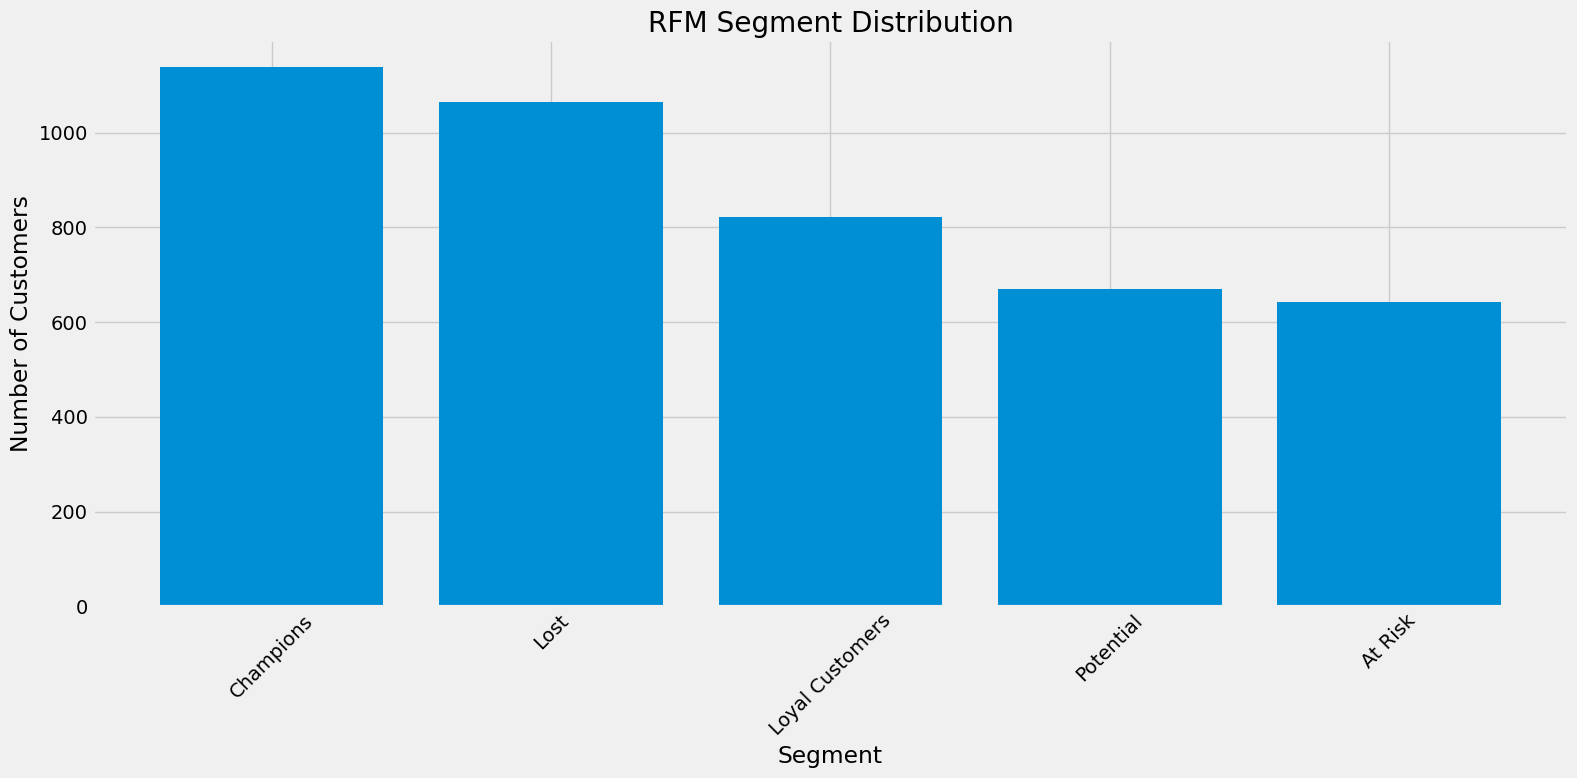

In [98]:
# Segment Distribution Bar Chart


segment_counts = rfm['Segment'].value_counts()

plt.figure()
plt.bar(segment_counts.index, segment_counts.values)
plt.title("RFM Segment Distribution")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [99]:
#📊 Average RFM Values by Segment

segment_means = rfm.groupby('Segment')[['Recency','Frequency','Monetary']].mean()
segment_means


,Recency,Frequency,Monetary
Segment,,,
At Risk,152.995334,3.390358,1242.868353
Champions,13.320738,9.962214,5168.427505
Lost,217.975564,1.097744,477.820001
Loyal Customers,38.070646,3.633374,1634.125993
Potential,36.839046,1.193741,450.948092


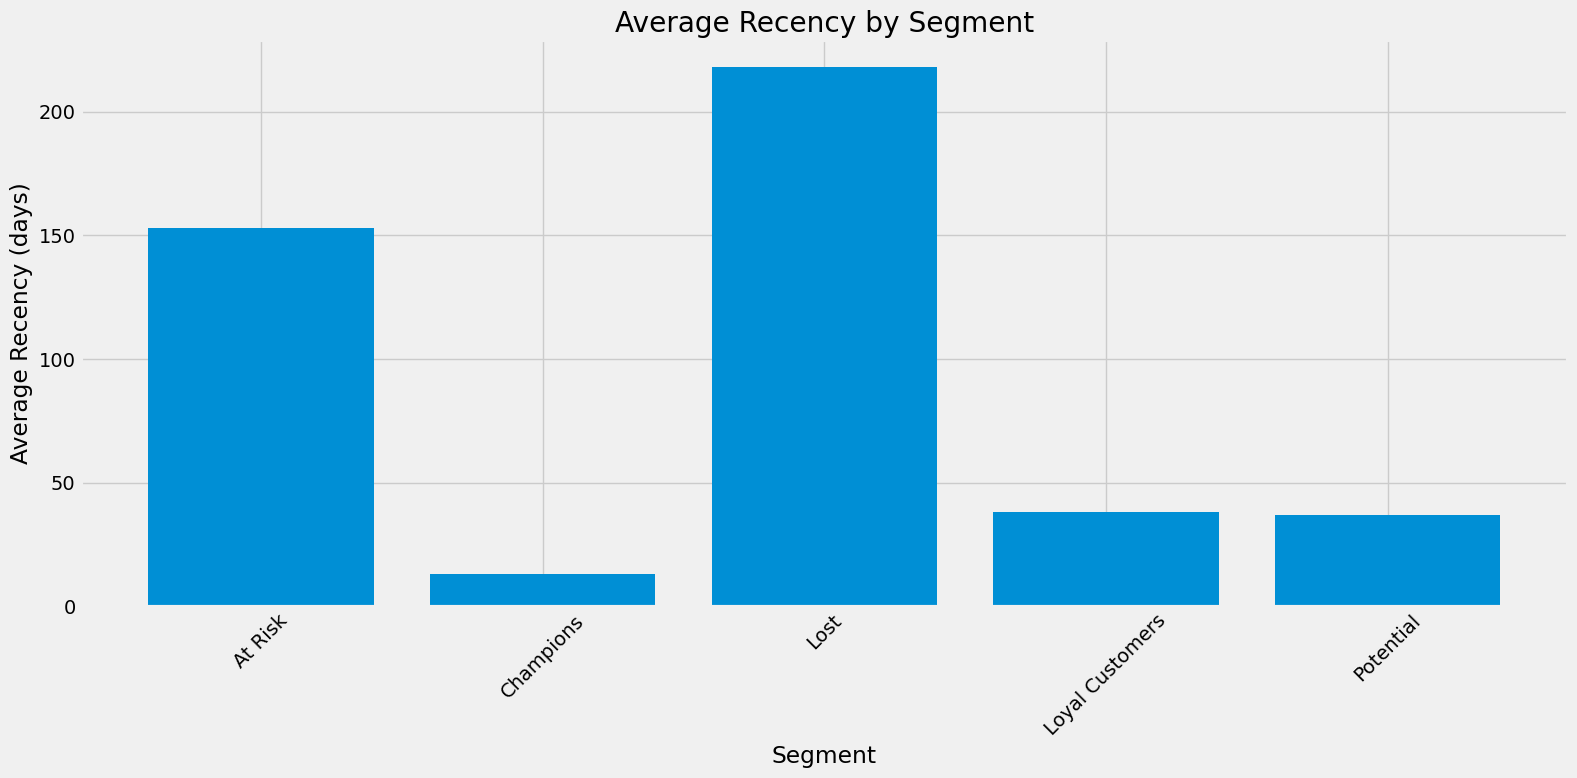

In [100]:
#🔵 Average Recency
plt.figure()
plt.bar(segment_means.index, segment_means['Recency'])
plt.title("Average Recency by Segment")
plt.xlabel("Segment")
plt.ylabel("Average Recency (days)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


-  🎯 Interpretation

- **Champions** are highly active and engaged customers.
- **Lost** customers show clear signs of churn.
- **At Risk** customers display strong warning signals and require attention.
- **Loyal** and **Potential** customers demonstrate reasonably healthy recency behavior and growth potential.


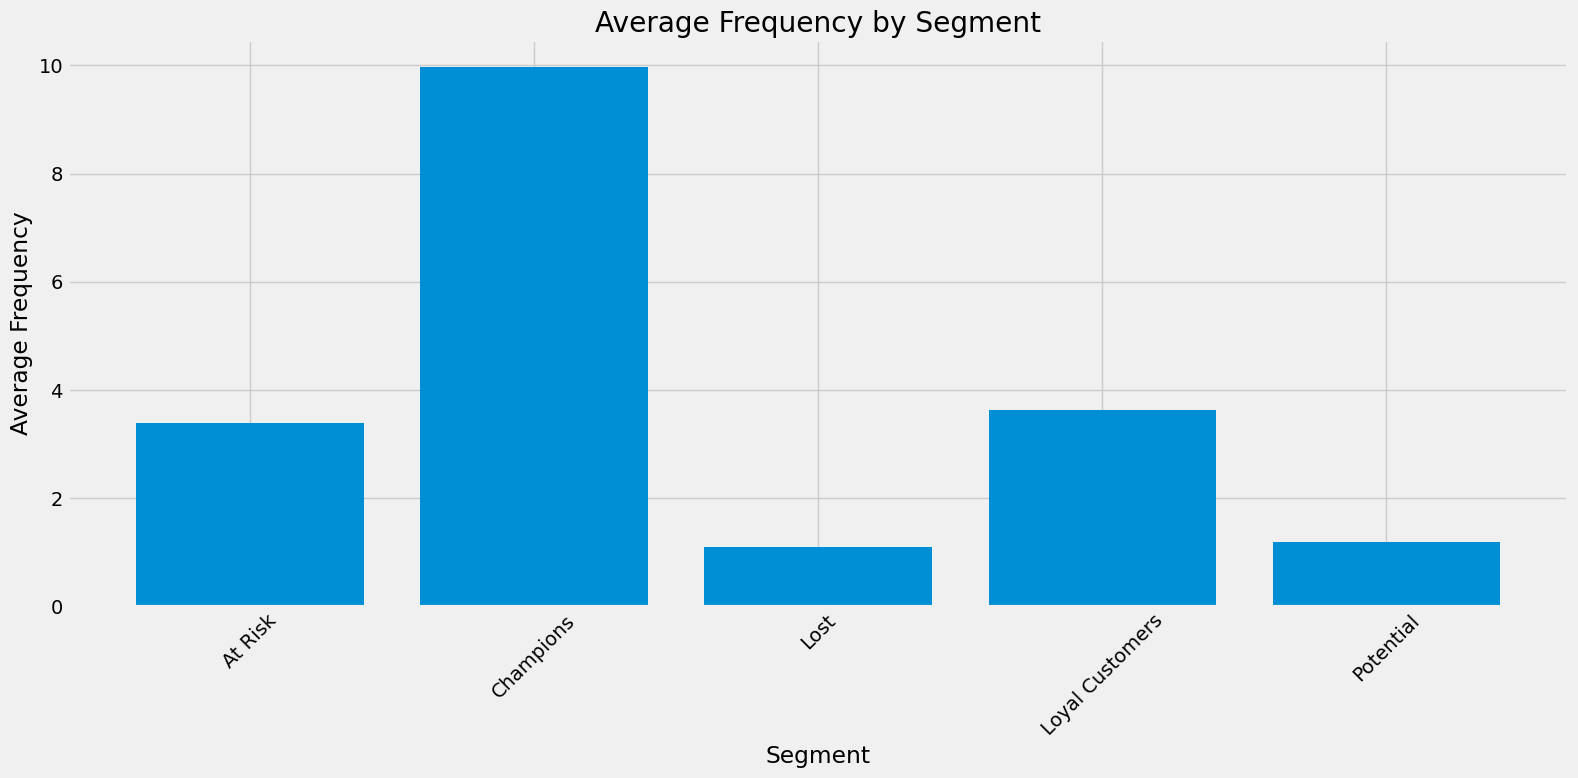

In [101]:
#🟢 Average Frequency
plt.figure()
plt.bar(segment_means.index, segment_means['Frequency'])
plt.title("Average Frequency by Segment")
plt.xlabel("Segment")
plt.ylabel("Average Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- 🎯 Interpretation

- **Champions** clearly lead in customer activity and value.
- **Lost** and **Potential** customers appear to be close to one-time buyers.
- **At Risk** customers were previously active but have recently stopped purchasing.


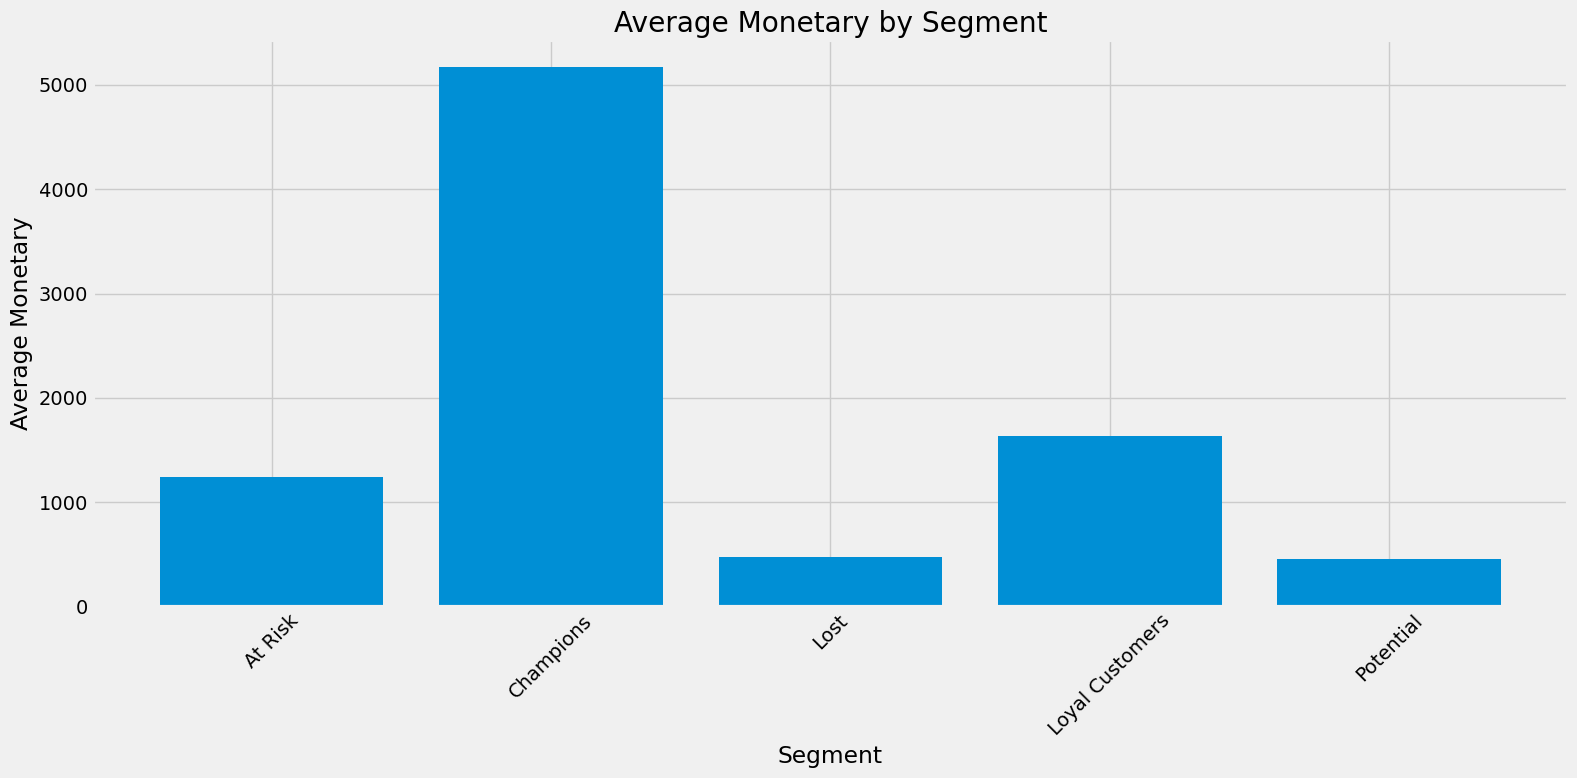

In [102]:
#🟣 Average Monetary

plt.figure()
plt.bar(segment_means.index, segment_means['Monetary'])
plt.title("Average Monetary by Segment")
plt.xlabel("Segment")
plt.ylabel("Average Monetary")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- 🎯 Interpretation

- **Champions** are by far the most valuable customers.
- **Loyal** customers show strong and stable value.
- **At Risk** customers are mid-value, but losing them could result in significant revenue loss.
- **Lost** customers already represent relatively low value.


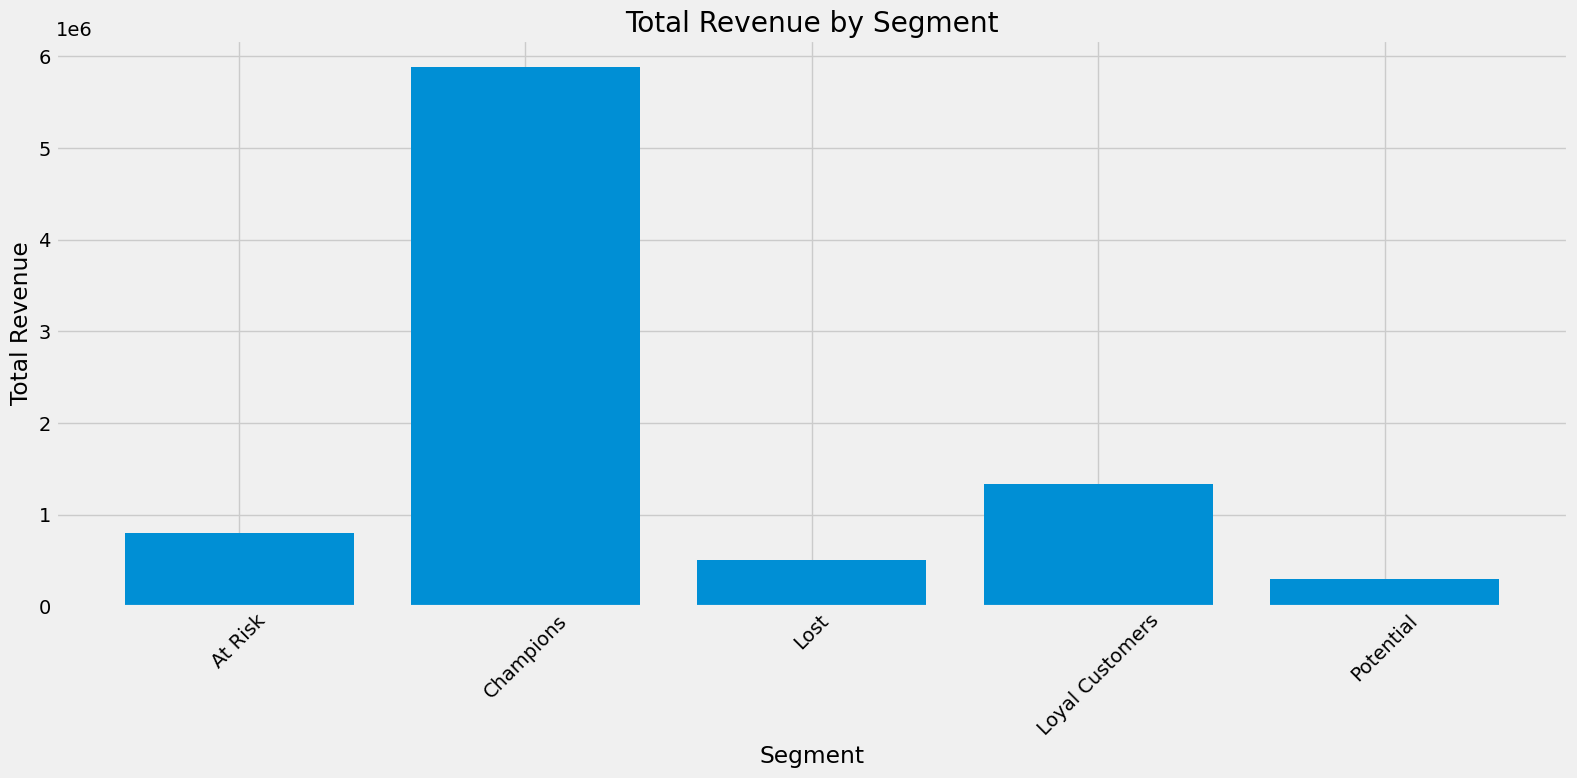

Segment
At Risk             799164.351
Champions          5881670.501
Lost                508400.481
Loyal Customers    1341617.440
Potential           302586.170
Name: Monetary, dtype: float64

In [103]:
#📊  Total Revenue by Segment

segment_revenue = rfm.groupby('Segment')['Monetary'].sum()

plt.figure()
plt.bar(segment_revenue.index, segment_revenue.values)
plt.title("Total Revenue by Segment")
plt.xlabel("Segment")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

segment_revenue


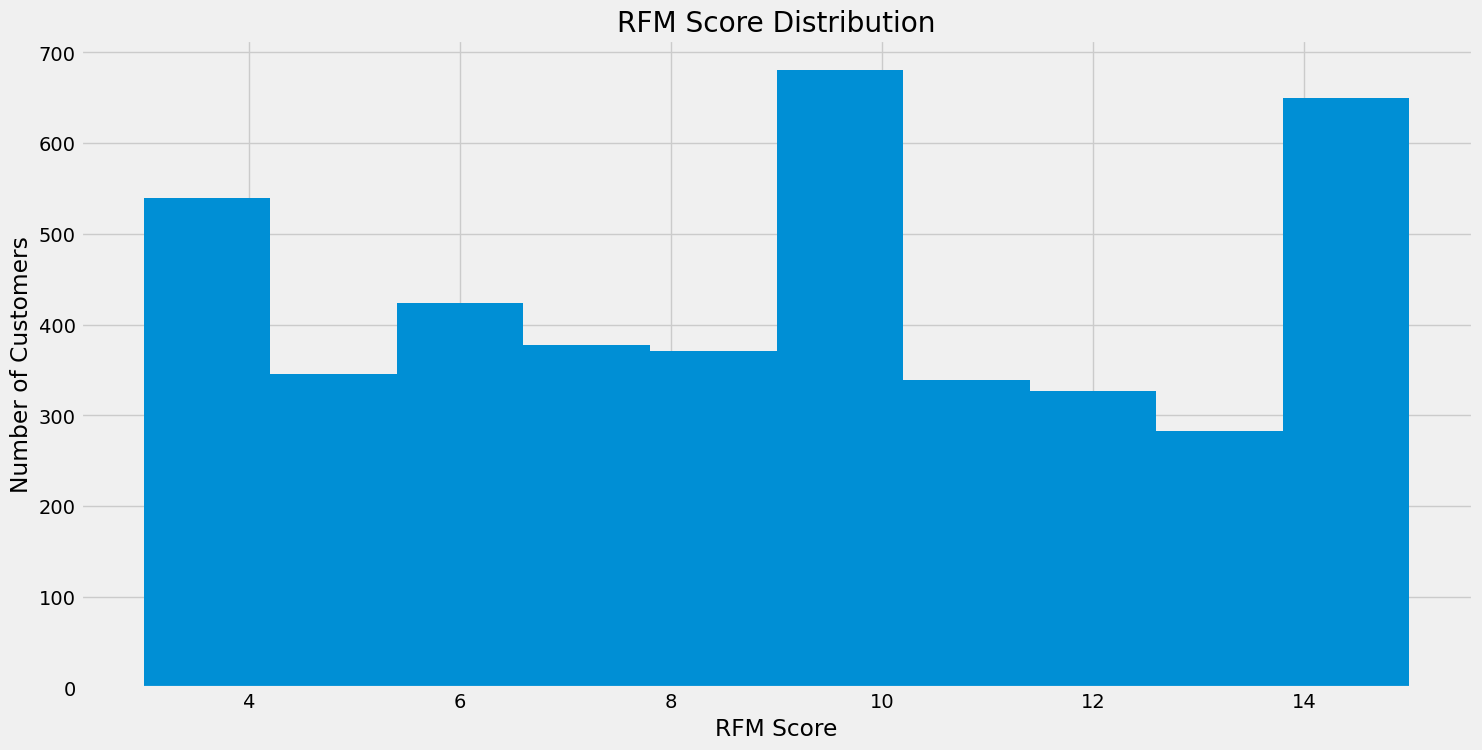

In [104]:
# RFM Score Distribution Within Each Segment
plt.figure()
plt.hist(rfm['RFM_Score'], bins=10)
plt.title("RFM Score Distribution")
plt.xlabel("RFM Score")
plt.ylabel("Number of Customers")
plt.show()


## 🧠 Strategic Insight Summary

### 🟢 Champions
- Should be retained and protected
- Ideal candidates for VIP programs
- Target with exclusive campaigns

### 🟡 Loyal
- High potential to be converted into Champions
- Maintain engagement through personalized offers

### 🟠 Potential
- Suitable for frequency-increasing campaigns
- Encourage repeat purchases

### 🔴 At Risk
- Most critical customer group
- Requires immediate win-back strategies

### ⚫ Lost
- Lower priority segment
- Re-engagement efforts may have limited return on resources


# 🎯 K-Means Clustering


- K-Means is an unsupervised machine learning algorithm used to group similar observations into **K clusters** based on feature similarity.  
- It works by iteratively assigning data points to the nearest cluster center (centroid) and updating those centers until convergence.

- In this project, K-Means is used to identify customer segments based on behavioral patterns.


## 🔹 Data Preparation for K-Means

In [105]:
# First, we select only the numerical metrics:
rfm_kmeans = rfm[['Recency','Frequency','Monetary']].copy()
rfm_kmeans.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1437.24
12349.0,19,1,1457.55
12350.0,310,1,294.40


## 🔹 Log Transformation

In [106]:
# Because Monetary and Frequency are right-skewed.
rfm_log = np.log1p(rfm_kmeans)
rfm_log.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.789960,0.693147,11.253955
12347.0,1.098612,2.079442,8.368925
12348.0,4.330733,1.609438,7.271175
12349.0,2.995732,0.693147,7.285198
12350.0,5.739793,0.693147,5.688330


## 🔹 Scaling

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)


## 🔹 Elbow Method (Optimal K)

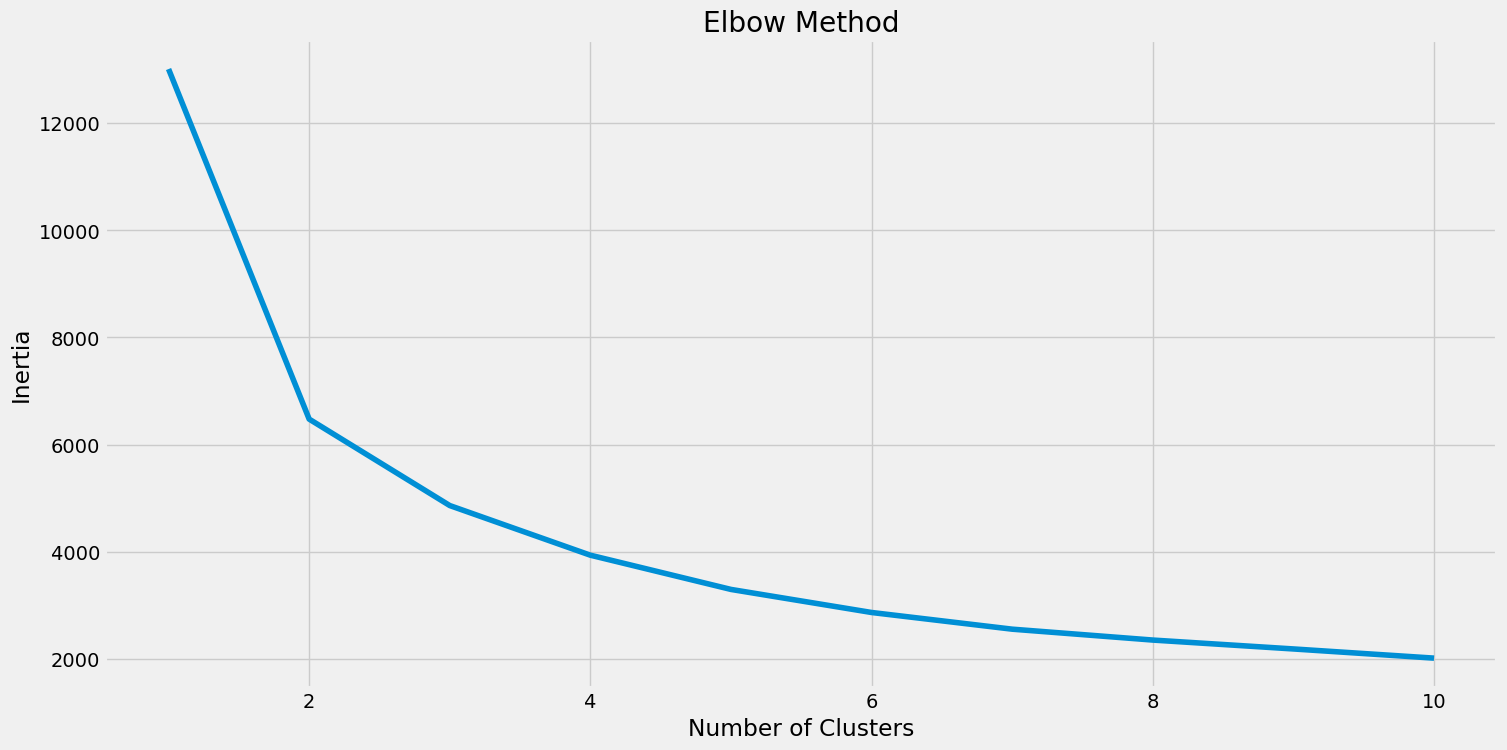

In [108]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,11), inertia)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


## 📏 What is the Silhouette Score?

The **Silhouette Score** measures how well data points are separated into clusters.

- The score ranges between **-1 and +1**
  - **+1** → well-separated and clearly defined clusters
  - **0** → points lie near cluster boundaries
  - **Negative values** → overlapping or poorly assigned clusters

### General Interpretation

| Score Range | Interpretation |
|-------------|----------------|
| > 0.5       | Very good clustering |
| 0.3 – 0.5   | Reasonable clustering |
| < 0.3       | Weak clustering |



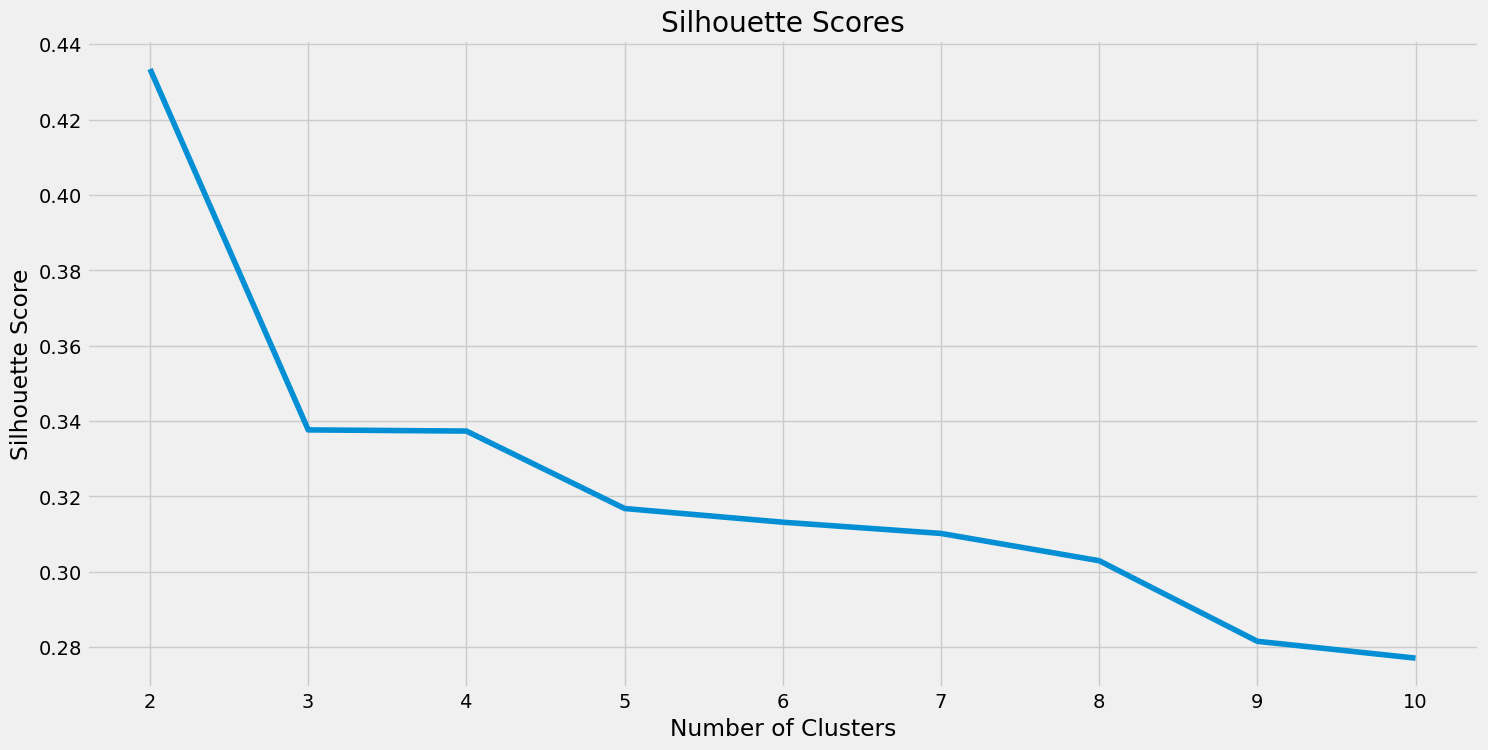

[(2, 0.4334173023809498),
 (3, 0.3376281409236904),
 (4, 0.3373171220199201),
 (5, 0.31675574748388724),
 (6, 0.31312453290360853),
 (7, 0.3101428558078239),
 (8, 0.30290603656454224),
 (9, 0.2815096694738889),
 (10, 0.27704299328971993)]

In [109]:
# Silhouette Analysis

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(rfm_scaled)
    sil = silhouette_score(rfm_scaled, labels)
    sil_scores.append(sil)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(2,11), sil_scores)
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

list(zip(range(2,11), sil_scores))


- 🎯 Technical Interpretation

The highest Silhouette score is observed at:

✅ **K = 2**

This suggests that the dataset naturally separates into **two major clusters**, likely representing:

- High-value, active customers
- Low-value or inactive customers

---

- 🤔 A Critical Observation

From the **Elbow Method**:
- **K = 3–4** also appeared reasonable.

From the **Silhouette Analysis**:
- **K = 2** clearly achieves the highest score.

---

- 🎯 How Is a Professional Decision Made?

Cluster selection should not rely solely on evaluation metrics.  
The key question is:

> **Is K = 2 sufficient from a business perspective?**

If we choose **K = 2**, the model essentially divides customers into:
- Group A
- Group B

However, the **RFM analysis produced five meaningful behavioral segments**, offering richer business insights.

---

- 📌 Recommended Approach

Using only two clusters would be overly coarse.

A more practical strategy is to experiment with **3 or 4 clusters** and evaluate interpretability:

- **K = 3** → simple yet meaningful segmentation
- **K = 4** → potentially closer to RFM-based segmentation

---

- 🔥 Final Decision

We proceed with:

✅ **K = 3**

**Reasoning:**
- Silhouette score remains acceptable (~0.338)
- Elbow method supports this choice
- Provides more actionable and interpretable business insights


## K-Means Clustering with K = 3

In [110]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()


,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment,Cluster
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,7,Lost,0
12347.0,2,7,4310.00,5,5,5,15,Champions,1
12348.0,75,4,1437.24,2,4,4,10,At Risk,0
12349.0,19,1,1457.55,4,1,4,9,Potential,0
12350.0,310,1,294.40,1,1,2,4,Lost,2


In [111]:

rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean()


,Recency,Frequency,Monetary
Cluster,,,
0,44.021239,3.378171,1260.341134
1,17.040629,13.372215,7892.633106
2,167.013305,1.351783,359.277095


## 📊 Cluster Averages — Interpretation

### 🔵 Cluster 0
- **Recency ≈ 44 days**
- **Frequency ≈ 3.3**
- **Monetary ≈ 1,260**

**Characteristics:**
- Moderately active customers
- Medium purchase frequency
- Moderate spending behavior

👉 This cluster most likely represents a mix of:
**Loyal** and **Potential** customers.

---

### 🟢 Cluster 1
- **Recency ≈ 17 days**
- **Frequency ≈ 13.3**
- **Monetary ≈ 7,892**

**Characteristics:**
- Very recent activity
- Very frequent purchases
- High spending levels

👉 This group clearly corresponds to **Champions**.

The machine learning model successfully identifies this high-value segment with strong separation.

---

### 🔴 Cluster 2
- **Recency ≈ 167 days**
- **Frequency ≈ 1.35**
- **Monetary ≈ 359**

**Characteristics:**
- Long period of inactivity
- Low purchase frequency
- Low spending

👉 Clearly represents **Lost / Low-Value customers**.

---

## 🧠 What Did K-Means Achieve?

While **RFM analysis produced 5 behavioral segments**,  
K-Means naturally simplified them into **3 data-driven clusters**:

| K-Means Cluster | Corresponding RFM Segments |
|-----------------|----------------------------|
| Cluster 1 | Champions |
| Cluster 0 | Loyal + Potential |
| Cluster 2 | Lost + Low At Risk |

---

## 🎯 Key Insight

K-Means effectively produced a **simplified, data-driven version of RFM segmentation**, grouping customers into broader but naturally occurring behavioral categories.


In [112]:
pd.crosstab(rfm['Segment'], rfm['Cluster'])


Cluster,0,1,2
Segment,,,
At Risk,277,22,344
Champions,461,677,0
Lost,29,0,1035
Loyal Customers,684,64,73
Potential,244,0,427


# Probabilistic CLV Modeling (BG/NBD + Gamma-Gamma)

- 📈 BG/NBD + Gamma-Gamma Models (Short Overview)

**BG/NBD (Beta-Geometric / Negative Binomial Distribution)** and **Gamma-Gamma** are probabilistic models commonly used together to estimate **Customer Lifetime Value (CLV)**.

- 🔹 BG/NBD — Purchase Frequency Model
Used to predict:
- How often a customer will make future purchases
- The probability that a customer is still active ("alive")

It models customer transaction behavior based on:
- Purchase frequency
- Recency
- Customer lifetime in the dataset

👉 **Purpose:** Forecast future transaction counts.

---

- 🔹 Gamma-Gamma — Monetary Value Model
Used to estimate:
- The expected average spending per transaction

It assumes that:
- Customer purchase frequency and spending behavior are independent.

👉 **Purpose:** Predict future average monetary value.

---

- 🎯 Why Use Them Together?

- **BG/NBD** → predicts *how many* purchases will happen  
- **Gamma-Gamma** → predicts *how much* customers will spend  

Combined, they allow estimation of:

✅ **Customer Lifetime Value (CLV)**

These models are widely used in marketing analytics, retention strategy, and revenue forecasting.



## 📦  Required Library

In [113]:
#!pip install lifetimes


In [114]:
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter


## 📊 Data Format Required for the Model

The **BG/NBD** model requires three key variables:

- **frequency** → number of repeat purchases  
- **recency** → time between the customer's first and last purchase  
- **T** → customer age (time between first purchase and the analysis date)

---

### ⚠️ Important Note

This **Recency** definition is **different from RFM Recency**.

**RFM Recency**
- Time from the **last purchase until today**

**BG/NBD Recency**
- Time between the **first purchase and the last purchase**


## 🚀 Creating the Summary Table


In [115]:
from lifetimes.utils import summary_data_from_transaction_data

clv_df = summary_data_from_transaction_data(
    df_clean,
    customer_id_col='CustomerID',
    datetime_col='InvoiceDate',
    monetary_value_col='Revenue',
    observation_period_end=df_clean['InvoiceDate'].max()
)

clv_df.head()


,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,599.701667
12348.0,3.0,283.0,358.0,261.480000
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000


In [116]:
clv_df.describe()


,frequency,recency,T,monetary_value
count,4337.000000,4337.000000,4337.000000,4337.000000
mean,2.854738,130.712935,222.796634,305.076733
std,5.942733,132.233264,117.846383,2613.225194
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,112.000000,0.000000
50%,1.000000,93.000000,248.000000,176.582500
75%,3.000000,252.000000,326.000000,358.755000
max,131.000000,373.000000,373.000000,168469.600000


- For the **BG/NBD** and **Gamma-Gamma** models:

✅ Customers with **frequency = 0** are not a problem for the **BG/NBD** model — it can still operate correctly.

However:

🔴 For the **Gamma-Gamma model**, customers must satisfy:




In [117]:
#🎯 Filter
clv_df = clv_df[clv_df['frequency'] > 0]


## 🚀  Training the BG/NBD Model

In [118]:
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(clv_df['frequency'], clv_df['recency'], clv_df['T'])

bgf.summary


,coef,se(coef),lower 95% bound,upper 95% bound
r,1.889065,0.067784,1.756208,2.021923
alpha,106.263713,4.232973,97.967087,114.560339
a,0.007818,0.004205,-0.000425,0.016060
b,0.142992,0.079719,-0.013258,0.299242


## 📊 Expected Purchases in the Next 6 Months

In [119]:
#For example, for 180 days:
clv_df['predicted_purchases_6m'] = bgf.predict(
    180,
    clv_df['frequency'],
    clv_df['recency'],
    clv_df['T']
)

clv_df.head()


,frequency,recency,T,monetary_value,predicted_purchases_6m
CustomerID,,,,,
12347.0,6.0,365.0,367.0,599.701667,2.990276
12348.0,3.0,283.0,358.0,261.480000,1.874888
12352.0,6.0,260.0,296.0,321.590000,3.511435
12356.0,2.0,303.0,325.0,269.905000,1.604914
12358.0,1.0,149.0,150.0,523.200000,1.910955


## 💰 Gamma-Gamma Model (Average Spending)

In [120]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef=0.001)
ggf.fit(clv_df['frequency'], clv_df['monetary_value'])

ggf.summary


,coef,se(coef),lower 95% bound,upper 95% bound
p,11.195421,0.270304,10.665626,11.725216
q,0.845491,0.019927,0.806434,0.884547
v,11.351539,0.282103,10.798616,11.904462


## 💎 CLV Calculation (6 Months)

In [121]:
clv_df['clv_6m'] = ggf.customer_lifetime_value(
    bgf,
    clv_df['frequency'],
    clv_df['recency'],
    clv_df['T'],
    clv_df['monetary_value'],
    time=6,        # months   
    freq='D',      # transaction data is daily-granularity  
    discount_rate=0.01
)

clv_df.head()


,frequency,recency,T,monetary_value,predicted_purchases_6m,clv_6m
CustomerID,,,,,,
12347.0,6.0,365.0,367.0,599.701667,2.990276,1741.645009
12348.0,3.0,283.0,358.0,261.480000,1.874888,482.617174
12352.0,6.0,260.0,296.0,321.590000,3.511435,1099.716675
12356.0,2.0,303.0,325.0,269.905000,1.604914,430.186770
12358.0,1.0,149.0,150.0,523.200000,1.910955,1000.541600


In [122]:
clv_df[['predicted_purchases_6m','clv_6m']].describe()


,predicted_purchases_6m,clv_6m
count,2782.000000,2782.000000
mean,2.990322,1495.725520
std,2.698710,6435.292318
min,0.210660,7.921699
25%,1.621114,378.164639
50%,2.406417,732.883820
75%,3.503421,1377.704697
max,49.839325,259993.122466


## 📊 Interpretation of CLV Results

### General Statistics

| Metric | Value |
|--------|-------|
| Average CLV (6 months) | ~1,495 |
| Median | ~733 |
| Max | 259,993 |

---

### 🔎 Key Insight

The distribution is **highly right-skewed**:

- A small number of customers have extremely high CLV values.
- The majority of customers fall within the **300–1,400** CLV range.


In [123]:
clv_df.sort_values(by='clv_6m', ascending=False).head(10)

#Top 10 Customers Expected to Generate the Highest Revenue in the Next 6 Months

,frequency,recency,T,monetary_value,predicted_purchases_6m,clv_6m
CustomerID,,,,,,
16446.0,1.0,205.0,205.0,168469.600000,1.575500,259993.122466
14646.0,44.0,353.0,354.0,6342.774091,17.916960,109809.786359
18102.0,25.0,367.0,367.0,9349.477200,10.208736,92249.465896
17450.0,26.0,359.0,367.0,7404.690385,10.586582,75763.932579
14096.0,16.0,97.0,101.0,4071.434375,15.477121,60930.859866
14911.0,131.0,372.0,373.0,1093.661679,49.839325,52659.716521
12415.0,14.0,313.0,337.0,8396.653571,6.432324,52226.246865
14156.0,42.0,362.0,371.0,2787.081667,16.522464,44499.257505
17511.0,27.0,371.0,373.0,3305.060741,10.830877,34599.028521


In [124]:
rfm_clv = rfm.merge(
    clv_df[['predicted_purchases_6m','clv_6m']],
    left_index=True,
    right_index=True,
    how='left'
)

rfm_clv.head()


,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment,Cluster,predicted_purchases_6m,clv_6m
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,7,Lost,0,NaN,NaN
12347.0,2,7,4310.00,5,5,5,15,Champions,1,2.990276,1741.645009
12348.0,75,4,1437.24,2,4,4,10,At Risk,0,1.874888,482.617174
12349.0,19,1,1457.55,4,1,4,9,Potential,0,NaN,NaN
12350.0,310,1,294.40,1,1,2,4,Lost,2,NaN,NaN


In [125]:
rfm_clv.groupby('Segment')['clv_6m'].mean()


Segment
At Risk             591.099789
Champions          2331.883048
Lost                394.651205
Loyal Customers    1247.761574
Potential           833.896325
Name: clv_6m, dtype: float64

- 🔥 Key Insight

RFM and CLV analyses validate each other:

- **Champions** are valuable both historically and in future value predictions.
- **Lost** customers show weak value both in the past and expected future performance.
- **Loyal** customers represent strong growth potential.

However:

- The CLV model tends to elevate some high-frequency customers more aggressively, highlighting their long-term revenue potential.

In [126]:
# Let’s Create a New Segment Using CLV

rfm_clv['CLV_Segment'] = pd.qcut(
    rfm_clv['clv_6m'],
    4,
    labels=['Low','Medium','High','Very High']
)


In [127]:
pd.crosstab(rfm_clv['Segment'], rfm_clv['CLV_Segment'])

#This will allow us to see whether RFM segments and CLV segments overlap.

CLV_Segment,Low,Medium,High,Very High
Segment,,,,
At Risk,299,171,99,49
Champions,71,222,346,498
Lost,64,24,5,5
Loyal Customers,221,239,210,130
Potential,41,39,35,14


- 🔥 Strongest Strategic Insight

- If we rely only on RFM analysis:

- **At Risk** customers may appear to be of medium priority.

- However, when CLV is incorporated:

- Some **At Risk** customers reveal significant future value potential.

- This highlights the importance of combining behavioral segmentation (RFM) with predictive value modeling (CLV).

In [128]:
# 📌 Calculate 12-Month CLV

clv_df['clv_12m'] = ggf.customer_lifetime_value(
    bgf,
    clv_df['frequency'],
    clv_df['recency'],
    clv_df['T'],
    clv_df['monetary_value'],
    time=12,         
    freq='D',
    discount_rate=0.01
)


In [129]:
# Monthly Summary

clv_df[['clv_6m','clv_12m']].describe()


,clv_6m,clv_12m
count,2782.000000,2782.000000
mean,1495.725520,2899.213659
std,6435.292318,12468.129977
min,7.921699,15.341710
25%,378.164639,732.872666
50%,732.883820,1420.363723
75%,1377.704697,2670.709362
max,259993.122466,503328.367236


- 📊 CLV Comparison — 6 Months vs 12 Months

- 🔹 Average CLV
- **6 months → 1,495**
- **12 months → 2,899**

This represents approximately a **1.94× increase**.

This behavior is expected because:
- The model is **not strictly linear**
- A **discount rate** is applied
- Purchase probability decreases over time

However, roughly:


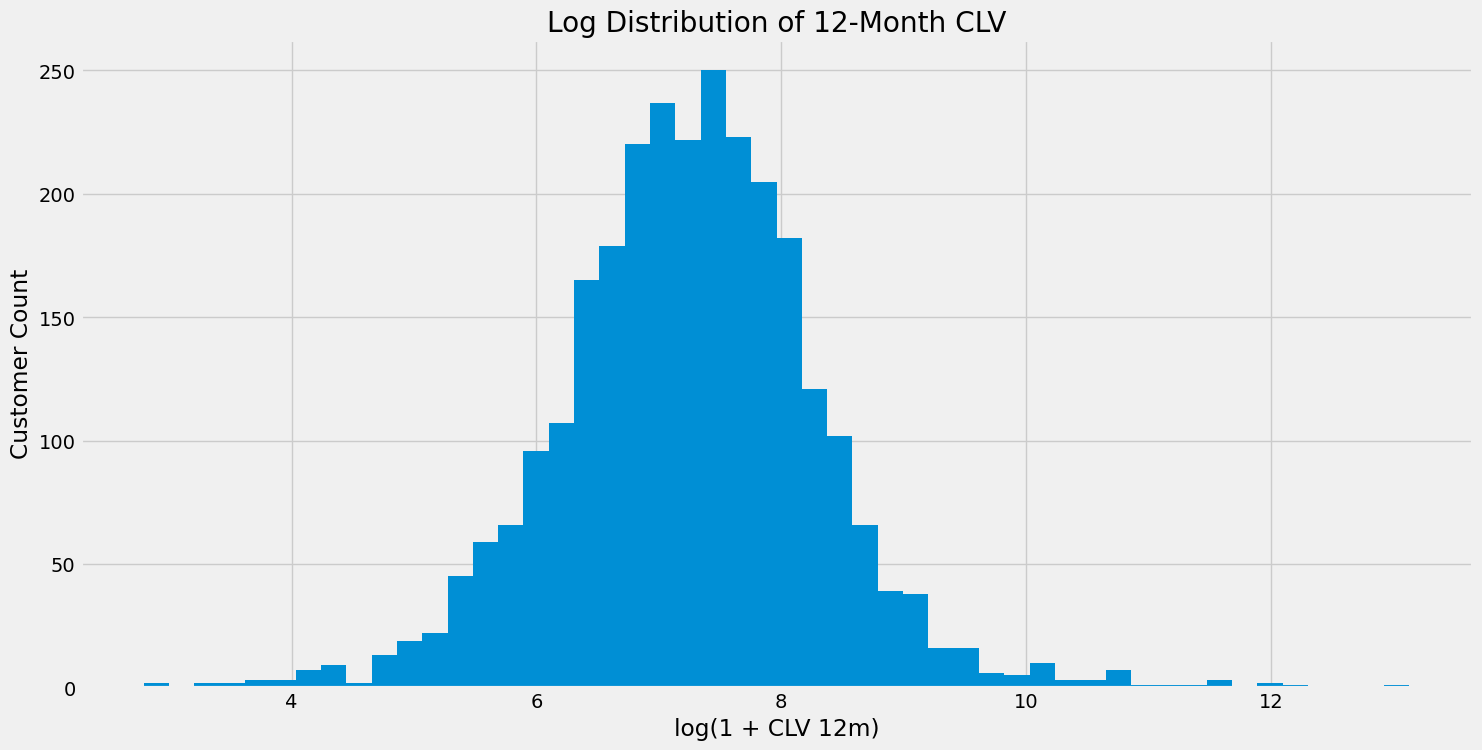

In [130]:
# Let’s Visualize the CLV Distribution

plt.figure()
plt.hist(np.log1p(clv_df['clv_12m']), bins=50)
plt.title("Log Distribution of 12-Month CLV")
plt.xlabel("log(1 + CLV 12m)")
plt.ylabel("Customer Count")
plt.show()


## 12-Month CLV by Segment

In [131]:
# Now let’s merge it back with the RFM data.

rfm_clv = rfm.merge(
    clv_df[['clv_6m','clv_12m']],
    left_index=True,
    right_index=True,
    how='left'
)


In [132]:
rfm_clv.groupby('Segment')['clv_12m'].mean()


Segment
At Risk            1145.375731
Champions          4521.798408
Lost                764.130765
Loyal Customers    2416.788175
Potential          1613.721342
Name: clv_12m, dtype: float64

## 🎯 Key Insight

The overall picture is now much clearer:

### 🟢 Champions
- Clear leaders in customer value
- Expected to be the primary revenue source over the next 12 months

### 🟡 Loyal
- Strong second-tier customer group
- Significant growth opportunity exists within this segment

### 🟠 Potential
- Mid-level customers
- Can transition into **Loyal** customers with the right marketing strategies

### 🔴 At Risk
- Lower current value but still meaningful
- CLV can increase significantly if successfully reactivated

### ⚫ Lost
- Low value, as expected

---

## 🧠 The Big Picture

Combining **RFM + CLV** reveals a consistent strategic framework:

- **Champions → Retain and protect**
- **Loyal → Develop and upgrade**
- **At Risk → Targeted win-back strategies**
- **Lost → Lower priority**

✅ The models produce consistent and aligned insights.

# Baseline Machine Learning Model

## Same-period XGBoost classification (baseline)"

- CLV has already been calculated.
- From this point forward, features will be engineered only from RFM metrics and transaction history, and CLV will not be used as an input feature.

## 📌 1️⃣ Create a High CLV Tag

In [133]:
#Recommendation: Top 25% → High CLV

threshold = rfm_clv['clv_12m'].quantile(0.75)

rfm_clv['High_CLV'] = (rfm_clv['clv_12m'] >= threshold).astype(int)

In [134]:
rfm_clv['High_CLV'].value_counts()

0    3641
1     696
Name: High_CLV, dtype: int64

## Feature Engineering

In [135]:
# Customer-Specific Key Features

customer_features = df_clean.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',            # total order
    'Revenue': ['mean','max','min','std'],  # Basket statistics
    'Quantity': ['mean','sum'],
    'StockCode': 'nunique'             # product variety
})

customer_features.columns = [
    'total_orders',
    'avg_basket','max_basket','min_basket','basket_std',
    'avg_quantity','total_quantity',
    'unique_products'
]

customer_features.head()



,total_orders,avg_basket,max_basket,min_basket,basket_std,avg_quantity,total_quantity,unique_products
CustomerID,,,,,,,,
12346.0,1,77183.600000,77183.6,77183.60,NaN,74215.000000,74215,1
12347.0,7,23.681319,249.6,5.04,23.289902,13.505495,2458,103
12348.0,4,53.231111,150.0,13.20,37.159075,86.370370,2332,21
12349.0,1,20.243750,63.8,6.64,11.434362,8.750000,630,72
12350.0,1,18.400000,25.2,8.50,5.214211,12.250000,196,16


In [136]:
# Time-Based Feature
customer_time = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': ['min','max']
})

customer_time.columns = ['first_purchase','last_purchase']

customer_time['customer_age_days'] = (
    customer_time['last_purchase'] - customer_time['first_purchase']
).dt.days

customer_time.head()


,first_purchase,last_purchase,customer_age_days
CustomerID,,,
12346.0,2011-01-18 10:01:00,2011-01-18 10:01:00,0
12347.0,2010-12-07 14:57:00,2011-12-07 15:52:00,365
12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,282
12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,0
12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,0


In [137]:
# Average Order Range
customer_time['avg_order_interval'] = (
    customer_time['customer_age_days'] /
    customer_features['total_orders']
)


In [138]:
# We are combining features.

features = customer_features.merge(
    customer_time[['customer_age_days','avg_order_interval']],
    left_index=True,
    right_index=True,
    how='left'
)

features.head()


,total_orders,avg_basket,max_basket,min_basket,basket_std,avg_quantity,total_quantity,unique_products,customer_age_days,avg_order_interval
CustomerID,,,,,,,,,,
12346.0,1,77183.600000,77183.6,77183.60,NaN,74215.000000,74215,1,0,0.000000
12347.0,7,23.681319,249.6,5.04,23.289902,13.505495,2458,103,365,52.142857
12348.0,4,53.231111,150.0,13.20,37.159075,86.370370,2332,21,282,70.500000
12349.0,1,20.243750,63.8,6.64,11.434362,8.750000,630,72,0,0.000000
12350.0,1,18.400000,25.2,8.50,5.214211,12.250000,196,16,0,0.000000


In [139]:
rfm_clv.columns

Index(['Recency', 'Frequency', 'Monetary', 'R_score', 'F_score', 'M_score',
       'RFM_Score', 'Segment', 'Cluster', 'clv_6m', 'clv_12m', 'High_CLV'],
      dtype='object')

## Add Target

In [140]:
#Let's add the high_CLV tag:
features = features.merge(
    rfm_clv[['High_CLV']],
    left_index=True,
    right_index=True,
    how='inner'
)

features.head()


,total_orders,avg_basket,max_basket,min_basket,basket_std,avg_quantity,total_quantity,unique_products,customer_age_days,avg_order_interval,High_CLV
CustomerID,,,,,,,,,,,
12346.0,1,77183.600000,77183.6,77183.60,NaN,74215.000000,74215,1,0,0.000000,0
12347.0,7,23.681319,249.6,5.04,23.289902,13.505495,2458,103,365,52.142857,1
12348.0,4,53.231111,150.0,13.20,37.159075,86.370370,2332,21,282,70.500000,0
12349.0,1,20.243750,63.8,6.64,11.434362,8.750000,630,72,0,0.000000,0
12350.0,1,18.400000,25.2,8.50,5.214211,12.250000,196,16,0,0.000000,0


In [141]:
# Missing Value Check

features.isna().sum()


total_orders           0
avg_basket             0
max_basket             0
min_basket             0
basket_std            73
avg_quantity           0
total_quantity         0
unique_products        0
customer_age_days      0
avg_order_interval     0
High_CLV               0
dtype: int64

In [142]:
features.fillna(0, inplace=True)


In [143]:
features.isna().sum()

total_orders          0
avg_basket            0
max_basket            0
min_basket            0
basket_std            0
avg_quantity          0
total_quantity        0
unique_products       0
customer_age_days     0
avg_order_interval    0
High_CLV              0
dtype: int64

In [144]:
features.shape

(4337, 11)

In [145]:
features.head()

,total_orders,avg_basket,max_basket,min_basket,basket_std,avg_quantity,total_quantity,unique_products,customer_age_days,avg_order_interval,High_CLV
CustomerID,,,,,,,,,,,
12346.0,1,77183.600000,77183.6,77183.60,0.000000,74215.000000,74215,1,0,0.000000,0
12347.0,7,23.681319,249.6,5.04,23.289902,13.505495,2458,103,365,52.142857,1
12348.0,4,53.231111,150.0,13.20,37.159075,86.370370,2332,21,282,70.500000,0
12349.0,1,20.243750,63.8,6.64,11.434362,8.750000,630,72,0,0.000000,0
12350.0,1,18.400000,25.2,8.50,5.214211,12.250000,196,16,0,0.000000,0


## Train / Test Split

In [146]:

X = features.drop('High_CLV', axis=1)
y = features['High_CLV']


In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


## XGBoost Model

In [148]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## Model Performance

In [149]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.96      0.97      0.96       729
           1       0.83      0.78      0.81       139

    accuracy                           0.94       868
   macro avg       0.90      0.88      0.89       868
weighted avg       0.94      0.94      0.94       868

ROC AUC: 0.9813383860812585


## Feature Importance

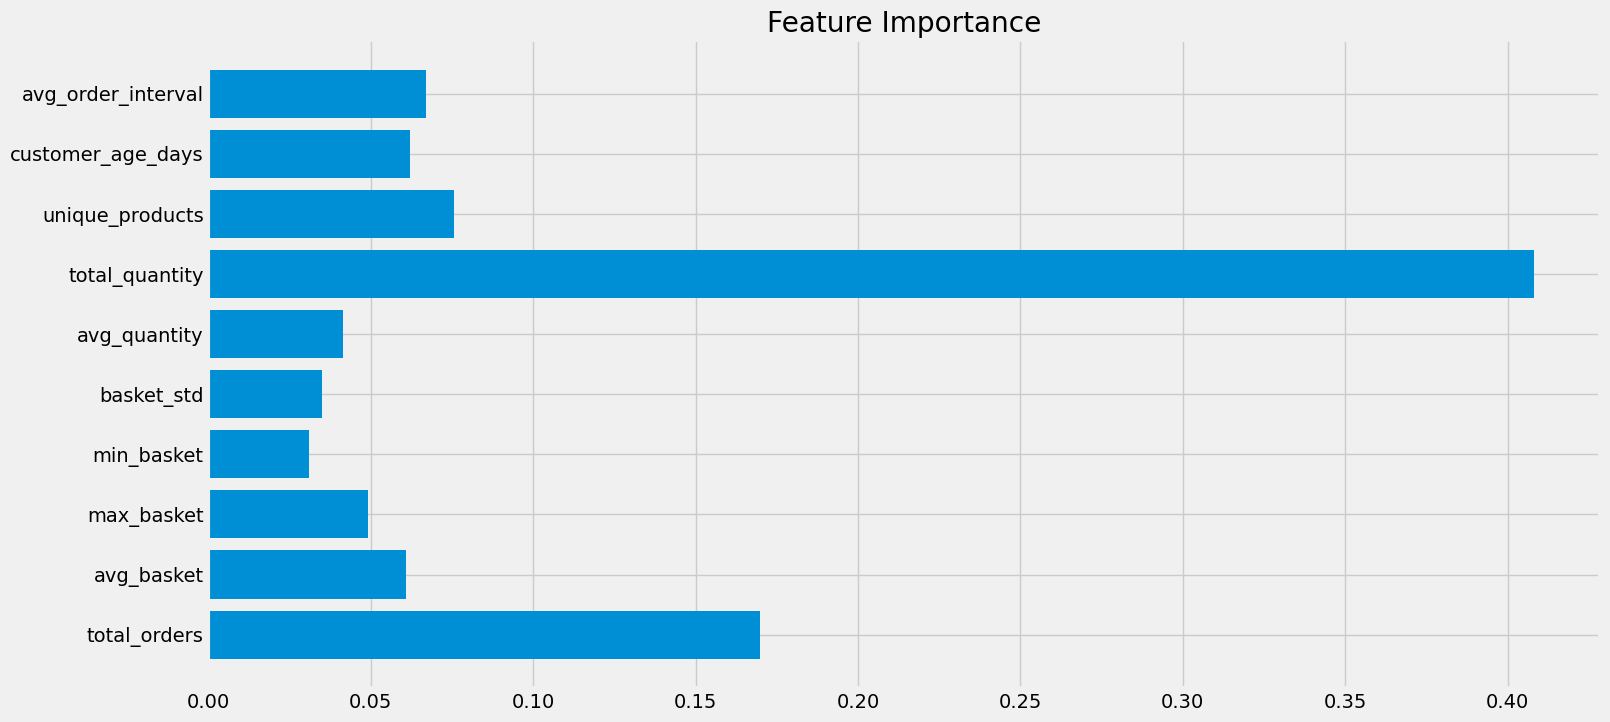

In [150]:
importances = model.feature_importances_
feature_names = X.columns

plt.figure()
plt.barh(feature_names, importances)
plt.title("Feature Importance")
plt.show()

# Leakage Analysis

- The initial classification model achieved an unusually high ROC AUC (~0.98).

- This raised concerns about potential target leakage, since CLV-based labels were derived from the same transactional period used for feature generation.

- To address this issue, a time-based validation approach was implemented in the next section.

# Time-Based Predictive Modeling (Final Model)

## Time-Based Predictive Modeling (Leakage-Free)

To avoid data leakage:

- A cutoff date was defined
- Features were generated using only historical data (pre-cutoff)
- The target variable was constructed using future 90-day revenue
- Time-based validation was applied

This approach better simulates real-world production deployment.

## Time-Based Split (cutoff + holdout)

In [151]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

end_date = df_clean['InvoiceDate'].max()
holdout_days = 90
cutoff_date = end_date - pd.Timedelta(days=holdout_days)

end_date, cutoff_date

(Timestamp('2011-12-09 12:50:00'), Timestamp('2011-09-10 12:50:00'))

## Separate Pre/Post Periods

In [152]:
df_pre  = df_clean[df_clean['InvoiceDate'] <= cutoff_date].copy()
df_post = df_clean[df_clean['InvoiceDate'] >  cutoff_date].copy()

df_pre.shape, df_post.shape


((235662, 9), (161111, 9))

## Pre-Period Feature Engineering (client-based)

In [153]:
#IMPORTANT: These features are only available before the cutoff.

basket_pre = (df_pre
              .groupby(['CustomerID','InvoiceNo'], as_index=False)['Revenue']
              .sum()
              .rename(columns={'Revenue':'basket_value'}))

# Customer features
feat = df_pre.groupby('CustomerID').agg(
    total_orders=('InvoiceNo','nunique'),
    total_quantity=('Quantity','sum'),
    avg_quantity=('Quantity','mean'),
    unique_products=('StockCode','nunique'),
    unique_invoices=('InvoiceNo','nunique')  
)

# Shopping cart statistics (invoice-level)
basket_stats = basket_pre.groupby('CustomerID')['basket_value'].agg(
    avg_basket='mean',
    max_basket='max',
    min_basket='min',
    basket_std='std'
)

# Time features
time_feat = df_pre.groupby('CustomerID')['InvoiceDate'].agg(
    first_purchase='min',
    last_purchase='max'
)
time_feat['customer_age_days'] = (cutoff_date - time_feat['first_purchase']).dt.days
time_feat['recency_days'] = (cutoff_date - time_feat['last_purchase']).dt.days

# Average order range 
time_feat['avg_order_interval'] = time_feat['customer_age_days'] / feat['total_orders'].replace(0, np.nan)


X = (feat
     .join(basket_stats, how='left')
     .join(time_feat[['customer_age_days','recency_days','avg_order_interval']], how='left'))


X = X.fillna(0)

X.shape, X.head()


((3369, 12),
             total_orders  total_quantity  avg_quantity  unique_products  \
 CustomerID                                                                
 12346.0                1           74215  74215.000000                1   
 12347.0                5            1590     12.822581               82   
 12348.0                3            2116     84.640000               21   
 12350.0                1             196     12.250000               16   
 12352.0                5             252      7.000000               25   
 
             unique_invoices  avg_basket  max_basket  min_basket  basket_std  \
 CustomerID                                                                    
 12346.0                   1   77183.600    77183.60    77183.60    0.000000   
 12347.0                   5     558.172      711.79      382.52  130.495277   
 12348.0                   3     389.080      652.80      187.44  238.810442   
 12350.0                   1     294.400      294.40 

## Generate Target from the Post-Period (income for the next 90 days)

In [154]:
y_cont = df_post.groupby('CustomerID')['Revenue'].sum().rename('future_90d_revenue')

data = X.join(y_cont, how='left')
data['future_90d_revenue'] = data['future_90d_revenue'].fillna(0)

thr = data['future_90d_revenue'].quantile(0.75)
data['High_Value_90d'] = (data['future_90d_revenue'] >= thr).astype(int)

thr, data['High_Value_90d'].value_counts()


(683.05,
 0    2526
 1     843
 Name: High_Value_90d, dtype: int64)

## Time-Based Train/Test Split (on a customer basis)

In [155]:
#Instead of a random split, to make it more like a "future time" scenario:
#We will sort and separate pre-season customers according to their last purchase date.

# Get customer's last_purchase (pre) date.
last_pre = df_pre.groupby('CustomerID')['InvoiceDate'].max().rename('last_pre_date')
data = data.join(last_pre, how='left')

# Time-based split: latest 20% test
data_sorted = data.sort_values('last_pre_date')
cut = int(len(data_sorted) * 0.8)

train = data_sorted.iloc[:cut].copy()
test  = data_sorted.iloc[cut:].copy()

features_cols = X.columns.tolist()
target_col = 'High_Value_90d'

X_train, y_train = train[features_cols], train[target_col]
X_test,  y_test  = test[features_cols],  test[target_col]

len(train), len(test), y_train.mean(), y_test.mean()


(2695, 674, 0.19925788497217067, 0.4540059347181009)

## XGBoost (Classification) 

In [156]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

model = XGBClassifier(
    n_estimators=600,
    max_depth=4,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

proba = model.predict_proba(X_test)[:,1]
pred  = (proba >= 0.5).astype(int)

print(classification_report(y_test, pred))
print("ROC AUC:", roc_auc_score(y_test, proba))
print("PR AUC :", average_precision_score(y_test, proba))


              precision    recall  f1-score   support

           0       0.77      0.73      0.75       368
           1       0.69      0.74      0.71       306

    accuracy                           0.73       674
   macro avg       0.73      0.73      0.73       674
weighted avg       0.73      0.73      0.73       674

ROC AUC: 0.8205100880932084
PR AUC : 0.8161647191577768


## Feature Importance

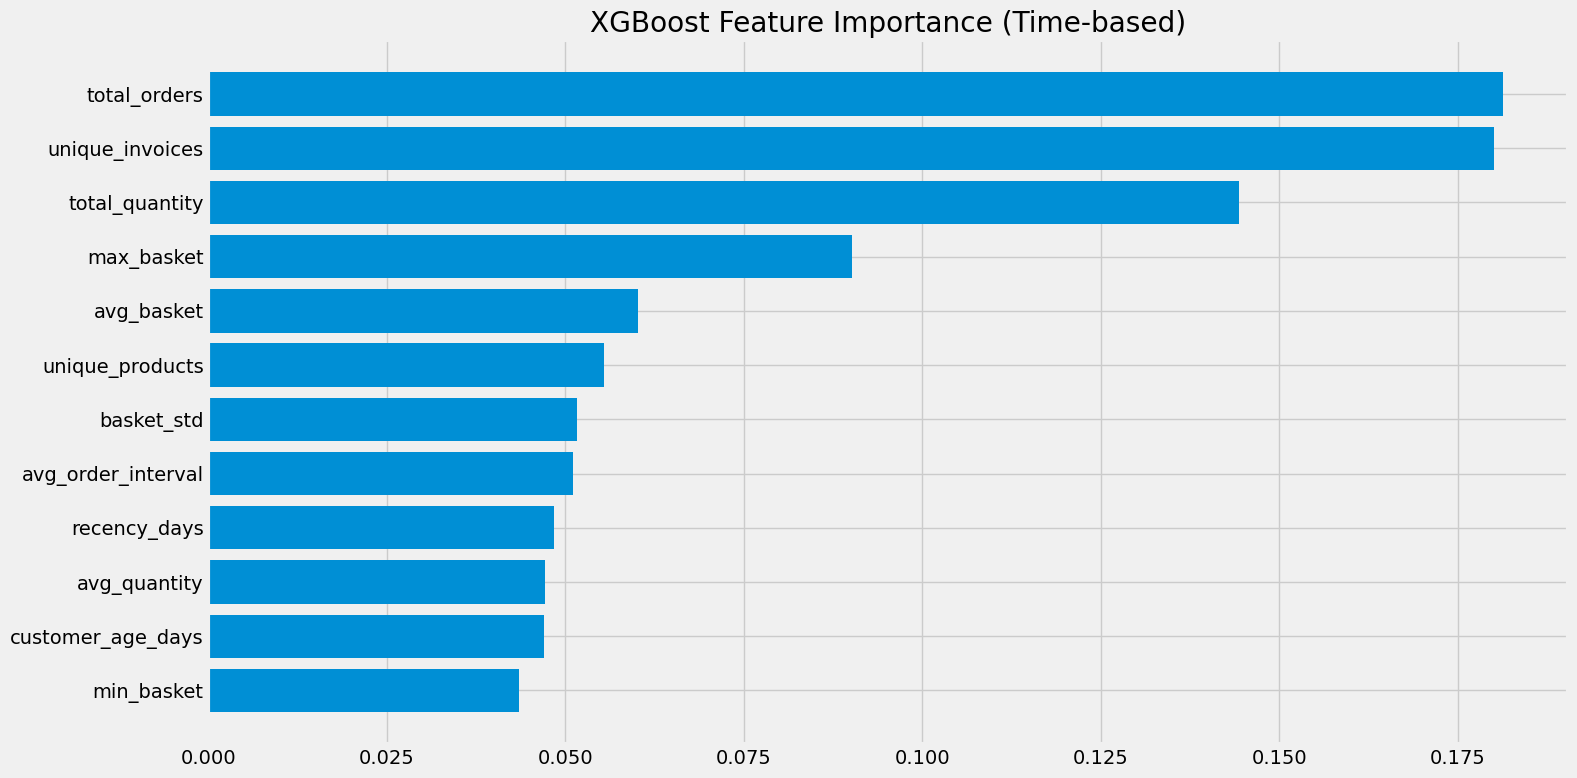

In [157]:


imp = model.feature_importances_
names = np.array(features_cols)

order = np.argsort(imp)
plt.figure()
plt.barh(names[order], imp[order])
plt.title("XGBoost Feature Importance (Time-based)")
plt.tight_layout()
plt.show()


- 📊 Model Performance (Time-Based Validation)

- **Accuracy:** 0.73  
- **ROC AUC:** 0.82  
- **PR AUC:** 0.81  

- What Does This Mean?

A score around **0.98** would be suspicious and likely indicate data leakage.

A **ROC AUC of 0.82** is strong yet realistic, suggesting that the model genuinely learns patterns rather than memorizing the data.

👉 The model is effectively attempting to **predict future customer value based on past behavior**.

---

- 🎯 Precision / Recall Interpretation

**Class 1 — High_Value_90d**

- **Precision:** 0.69  
- **Recall:** 0.74  

This represents a well-balanced performance:

- The model does **not produce excessive false positives**
- It also **successfully captures most high-value customers** without missing many

Overall, the balance between precision and recall indicates reliable detection of high-value customers.

# 📌 Final Conclusion 
## Final Insights

- Purchase frequency and transaction volume are strong predictors of future value.
- Champions remain the highest-value segment historically and predictively.
- Time-based validation significantly reduces over-optimistic model performance.
- The final XGBoost model achieved:

  - ROC AUC: 0.82
  - PR AUC: 0.81

This project demonstrates segmentation, probabilistic modeling, and leakage-aware predictive machine learning in a single pipeline.